# The brief

Working with real-world data to address a problem faced by the National Health Service (NHS). The analysis uses Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# Library imports

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import calendar

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

#

# Define functions

In [6]:
# Function to return % of appointments by a columns in that DataFrame
# This will be useful for a high-level overview of how services are used

def rel_freq(df, col):
    
    """ Count unique values in a column"""
    print(f"Number of unique values for {col}: {df[col].nunique()}")
    print()
    
    """Return relative frequency of appointments for a given column"""
    print(f"Percentage (%) of total appointments for each:")
    grouped = df.groupby(col)[['count_of_appointments']].sum().sort_values(by='count_of_appointments', ascending=False)
    total = df[['count_of_appointments']].sum()
    rel_freq_breakdown = grouped / total *100
    return rel_freq_breakdown.rename(columns={col:col, 'count_of_appointments' : '% of appts'}).reset_index()

In [7]:
# Function to break down DNA appointments by other variables in the nc data set
def dna_breakdown(col):
    total = ar2.groupby(col)[['count_of_appointments']].sum()
    dna = ar2[ar2['appointment_status'] == 'DNA'].groupby(col)[['count_of_appointments']].sum()
    percent_dna = (dna / total * 100).reset_index().copy()
    percent_dna.columns = [col, 'percent_dna']  
    return percent_dna

#### Charting functions

In [9]:
# Function to set a default chart style

# NHS colour palette for charts
nhs_cols = ['#005EB8', '#41B6E6', '#78BE20', '#009639', '#AE2573', '#768692', '#003087', '#ED8B00', '#006747', '#DA291C', '#425563']

def default_style():
    sns.set(rc={'figure.figsize':(12, 6)})
    sns.set(font_scale=1.3)
    sns.set_palette(nhs_cols)
    sns.set_style('ticks', {
       'axes.spines.top': False,     # Removes top axis line
       'axes.spines.right': False})  # Removes right axis line

In [10]:
# Function with figsize amended for easier screengrabbing to pptx report

def pptx_style():
    sns.set(rc={'figure.figsize':(10, 6)})
    sns.set(font_scale=1.3)
    sns.set_palette(nhs_cols)
    sns.set_style('ticks', {
       'axes.spines.top': False,     # Removes top axis line
       'axes.spines.right': False})  # Removes right axis line

In [11]:
# Style specifically for DNA charts in pptx

def dna_style():
    sns.set(rc={'figure.figsize':(6, 6)})
    sns.set(font_scale=1.3)
    sns.set_palette(nhs_cols)
    sns.set_style('ticks', {
       'axes.spines.top': False,     # Removes top axis line
       'axes.spines.right': False})  # Removes right axis line

In [12]:
# Function to show int not float on y axis
def int_y():
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [13]:
# Function to show int not float on x axis
def int_x():
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [14]:
# Function to show axis in millions and add grid labels
def mil_y():
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
    plt.grid(axis='y')

In [15]:
# Function to show axis in thousands and add grid labels
def thou_y():
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
    plt.grid(axis='y')

#

# Data import

### Actual Duration data set import and review

In [19]:
# Import the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [20]:
# Sense check and review the metadata of the ad data set.
print(ad.shape)
print(ad.info())

(137793, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [21]:
# Determine whether there are missing values in the ad DataFrame.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [22]:
# Check for duplicates.
ad.duplicated().sum()

0

In [23]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


###

### Appointments Regional data set import and review

In [26]:
# Import the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [27]:
# Sense check and review the metadata of the ar data set.
print(ar.shape)
print(ar.info())

(596821, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [28]:
# Determine whether there are missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [29]:
# Check for duplicates
ar.duplicated().sum()

21604

In [30]:
dupes = ar[ar.duplicated(subset=None, keep=False)]
dupes

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
13236,E54000044,2020-01,Attended,GP,Home Visit,Unknown / Data Quality,1
13252,E54000044,2020-01,Attended,GP,Unknown,Unknown / Data Quality,2
13307,E54000044,2020-01,DNA,GP,Home Visit,8 to 14 Days,1
13332,E54000044,2020-01,DNA,Other Practice staff,Home Visit,2 to 7 Days,1
13349,E54000044,2020-01,DNA,Other Practice staff,Unknown,More than 28 Days,32
...,...,...,...,...,...,...,...
596809,E54000050,2022-06,Unknown,Unknown,Telephone,15 to 21 Days,1
596812,E54000050,2022-06,Unknown,Unknown,Telephone,More than 28 Days,1
596814,E54000050,2022-06,Unknown,Unknown,Unknown,1 Day,2
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8


**Note: Duplicates have been reviewed manually in Excel and determined to be actual dupliates**

In [32]:
# Drop duplicates
ar_clean = ar.drop_duplicates()

# Check the results
print(ar_clean.shape)
print(f"Number of duplicates: {ar_clean.duplicated().sum()}")

(575217, 7)
Number of duplicates: 0


In [33]:
# Determine the descriptive statistics of the data set.
ar_clean.describe()

,count_of_appointments
count,575217.000000
mean,1290.868940
std,5960.868058
min,1.000000
25%,8.000000
50%,52.000000
75%,332.000000
max,211265.000000


### National Categories data set import and review

In [35]:
# Import the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [36]:
# # Sense check and review the metadata of the nc data set.
print(nc.shape)
print(nc.info())

(817394, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [37]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [38]:
# Check for duplicates
nc.duplicated().sum()

0

In [39]:
# Determine the descriptive statistics of the data set.
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


**Observations**
- count_of_appointments is the only numeric column in the data
- count_of_appointments is already aggregated, meaning a sum of this column will be required for analysis
- Dates vary in aggregation level (day vs. month) and format (object vs. datetime64) across tables


#

# Initial data exploration
*A function rel_freq() has been created to count unique values per column and provide a high-level overview of value breakdowns (see beginning of this notebook for code)*

### Number of unique locations

In [44]:
# Determine the number of locations
print("Number of ICB locations:", nc['icb_ons_code'].nunique())
print("Number of Sub-ICB locations:", nc['sub_icb_location_name'].nunique())
print("Number of ONS regions:", ad['region_ons_code'].nunique())

Number of ICB locations: 42
Number of Sub-ICB locations: 106
Number of ONS regions: 7


### Five locations with the highest number of appointments

*Note: nc data has been used as the set spans a broader range of dates than ad data set. (ar does not include sub-ICB-level data.)*

In [46]:
# Determine the top five ICB locations based on appointment volume
print("Five locations with highest number of appointments:")
nc.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()

Five locations with highest number of appointments:


,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,12142390
1,NHS North East London ICB - A3A8R,9588891
2,NHS Kent and Medway ICB - 91Q,9286167
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102
4,NHS South East London ICB - 72Q,7850170


### Count and frequency breakdown of variables

In [48]:
# Determine number and overall appointment distribution of service settings
rel_freq(nc, 'service_setting')

Number of unique values for service_setting: 5

Percentage (%) of total appointments for each:


,service_setting,% of appts
0,General Practice,91.475982
1,Unmapped,3.742925
2,Primary Care Network,2.214983
3,Other,1.830817
4,Extended Access Provision,0.735292


In [49]:
# Determine number and overall appointment distribution of context types
rel_freq(nc, 'context_type')

Number of unique values for context_type: 3

Percentage (%) of total appointments for each:


,context_type,% of appts
0,Care Related Encounter,86.835995
1,Inconsistent Mapping,9.421080
2,Unmapped,3.742925


In [50]:
# Determine number and overall appointment distribution of national categories
rel_freq(nc, 'national_category')

Number of unique values for national_category: 18

Percentage (%) of total appointments for each:


,national_category,% of appts
0,General Consultation Routine,32.856809
1,General Consultation Acute,18.136036
2,Clinical Triage,14.033919
3,Planned Clinics,9.464636
4,Inconsistent Mapping,9.421080
5,Planned Clinical Procedure,8.681971
6,Unmapped,3.742925
7,Unplanned Clinical Activity,1.032200
8,Home Visit,0.724363
9,Structured Medication Review,0.627732


In [51]:
# Determine number and overall appointment distribution of HCP types
rel_freq(ar_clean, 'hcp_type')

Number of unique values for hcp_type: 3

Percentage (%) of total appointments for each:


,hcp_type,% of appts
0,GP,51.113380
1,Other Practice staff,45.725976
2,Unknown,3.160644


In [52]:
# Determine the number and overall appointment distribution of appointment modes
rel_freq(ar_clean, 'appointment_mode')

Number of unique values for appointment_mode: 5

Percentage (%) of total appointments for each:


,appointment_mode,% of appts
0,Face-to-Face,59.240310
1,Telephone,36.059498
2,Unknown,3.560707
3,Home Visit,0.653003
4,Video/Online,0.486482


In [53]:
# Determine the number and overall appointment distribution of appointment statuses
rel_freq(ar_clean, 'appointment_status')

Number of unique values for appointment_status: 3

Percentage (%) of total appointments for each:


,appointment_status,% of appts
0,Attended,91.261809
1,Unknown,4.585763
2,DNA,4.152428


In [54]:
# Determine the number and overall appointment distribution of appointment lead times
rel_freq(ar_clean, 'time_between_book_and_appointment')

Number of unique values for time_between_book_and_appointment: 8

Percentage (%) of total appointments for each:


,time_between_book_and_appointment,% of appts
0,Same Day,46.153289
1,2 to 7 Days,20.706152
2,8 to 14 Days,11.690704
3,1 Day,9.113844
4,15 to 21 Days,5.747107
5,22 to 28 Days,3.434687
6,More than 28 Days,3.100843
7,Unknown / Data Quality,0.053372


In [55]:
# Determine the number and overall appointment distribution of appointment durations.
rel_freq(ad, 'actual_duration')

Number of unique values for actual_duration: 7

Percentage (%) of total appointments for each:


,actual_duration,% of appts
0,Unknown / Data Quality,23.981379
1,6-10 Minutes,20.121845
2,1-5 Minutes,17.026281
3,11-15 Minutes,14.978437
4,16-20 Minutes,9.527432
5,21-30 Minutes,8.945293
6,31-60 Minutes,5.419332


**Observations on overall GP utilisation patterns**
- 91% of appointments take place in the general practice service settig).
- 87are care-related encounterse).
- About a third of appointments are routine general consultat, aher third are acute consultations and clinical triage, 18% are planned clinics and planned clinical procedures. Othcategoriesits account for less than 2% of appointmery).51%half of appointments are wGPsit46%half with other practstaffype).
- 60% of appointments are fa-facemode).
- 46% of appointments are made same day; about three quarters occur within a week of making the appotment).
- Only 5% of appointments are longer thaan hour.ation).
- Only 5% of appointments are unattended (DNA). How this varies by the other variables will be key to better understanding patterns i appointments.status).

#

# Time Ranges - Assignment 3

### Between what dates were appointments scheduled?

In [60]:
# Convert dates to datetime format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])
ar_clean['appointment_month'] = pd.to_datetime(ar['appointment_month'])

In [61]:
# Determine the minimum and maximum dates in the ad DataFrame.
print(f"ad min date: {ad['appointment_date'].min()}")
print(f"ad max date: {ad['appointment_date'].max()}")
print(f"ad date range: {ad['appointment_date'].max() - ad['appointment_date'].min()}")

ad min date: 2021-12-01 00:00:00
ad max date: 2022-06-30 00:00:00
ad date range: 211 days 00:00:00


In [62]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(f"nc min date: {nc['appointment_date'].min()}")
print(f"nc max date: {nc['appointment_date'].max()}")
print(f"nc date range: {nc['appointment_date'].max() - nc['appointment_date'].min()}")

nc min date: 2021-08-01 00:00:00
nc max date: 2022-06-30 00:00:00
nc date range: 333 days 00:00:00


In [63]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print(f"ar min date: {ar_clean['appointment_month'].min()}")
print(f"ar max date: {ar_clean['appointment_month'].max()}")
print(f"ar date range: {ar_clean['appointment_month'].max() - ar_clean['appointment_month'].min()}")

ar min date: 2020-01-01 00:00:00
ar max date: 2022-06-01 00:00:00
ar date range: 882 days 00:00:00


### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [65]:
# Create a DataFrame filtered to specific location and date range.
nw_lon = nc[(nc['sub_icb_location_name'].str.contains('NHS North West London')) & \
    (nc['appointment_date'] >= '2022-01-01') & (nc['appointment_date'] <= '2022-06-01')].copy()

# Determine most popular service setting.
nw_lon.groupby('service_setting')['count_of_appointments']\
    .sum().sort_values(ascending=False).reset_index()

,service_setting,count_of_appointments
0,General Practice,4804239
1,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
4,Extended Access Provision,98159


In [66]:
# For each of these service settings, determine the number of records available for the period and the location. 
nw_lon['service_setting'].value_counts().reset_index()

,service_setting,count
0,General Practice,2104
1,Other,1318
2,Primary Care Network,1272
3,Extended Access Provision,1090
4,Unmapped,152


### Which month had the highest number of appointments?

In [68]:
# Group by month and sum of appointments
ar_clean.groupby('appointment_month')[['count_of_appointments']]\
    .sum().sort_values(by='count_of_appointments', ascending=False).head(5).reset_index()

,appointment_month,count_of_appointments
0,2021-11-01,30395923
1,2021-10-01,30296850
2,2022-03-01,29586020
3,2021-09-01,28514685
4,2020-10-01,28296051


### What was the total number of records per month?

In [70]:
# Total number of records per month.
ar_clean['appointment_month'].value_counts().reset_index().head(10)

,appointment_month,count
0,2020-03-01,20557
1,2020-01-01,20136
2,2021-11-01,20030
3,2020-02-01,19901
4,2021-10-01,19852
5,2022-03-01,19804
6,2021-09-01,19732
7,2021-12-01,19660
8,2022-05-01,19530
9,2022-01-01,19506


**Observations on time frames**
- ar time range is the longest of the 3 data sets. This will be useful to explore trends over time at a monthly/seasonal level.
- nc time range is only 11 months, but data is aggregated daily. This will be useful when looking at daily capacity and patterns by day of week.
- ad contains the shortest time frame and limited columns/variables to explore outside of appointment duration

#

# Additions/Alterations to DataFrames

### Clean up values in time_between_book_and_appointment (ar data set)

In [75]:
# Dictionary to rename values for time_between_book_and_appointment
time_mapper = {'1 Day' : 'Next Day', 
               '15  to 21 Days' : '15-21 Days', 
               '2 to 7 Days' : '2-7 Days', 
               '22  to 28 Days' : '22-28 Days',
               '8  to 14 Days' : '8-14 Days', 
               'More than 28 Days' : '28+ Days', 
               'Same Day' : 'Same Day',
               'Unknown / Data Quality' : 'Unknown'}

# Copy ar 
ar1 = ar_clean.copy()

# Map new values
ar1['time_between_book_and_appointment'] = ar_clean['time_between_book_and_appointment'].map(time_mapper)

ar1.sample(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
93607,E54000058,2022-03-01,Attended,Unknown,Face-to-Face,Unknown,1
19425,E54000044,2020-01-01,DNA,Unknown,Telephone,Same Day,30
471169,E54000023,2020-02-01,DNA,Other Practice staff,Home Visit,Same Day,34
251908,E54000041,2021-02-01,DNA,Other Practice staff,Face-to-Face,Same Day,839
529259,E54000008,2022-05-01,Unknown,Other Practice staff,Telephone,8-14 Days,312


### Date Parts
Purpose: Analyse patterns by different time breakdowns (inc. day of week)

In [77]:
# Add date-part columns to nc
nc['year'] = nc['appointment_date'].dt.year
nc['month'] = nc['appointment_date'].dt.month
nc['day_num'] = nc['appointment_date'].dt.day
nc['day'] = nc['appointment_date'].dt.day_name()

nc.sample(3)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month,day_num,day
554206,2022-05-09,E54000008,NHS Cheshire and Merseyside ICB - 27D,Other,Inconsistent Mapping,Inconsistent Mapping,44,2022-05,2022,5,9,Monday
346978,2021-09-15,E54000025,NHS Hertfordshire and West Essex ICB - 07H,Primary Care Network,Care Related Encounter,Structured Medication Review,25,2021-09,2021,9,15,Wednesday
332780,2021-08-04,E54000023,NHS Suffolk and North East Essex ICB - 06T,General Practice,Care Related Encounter,Planned Clinical Procedure,464,2021-08,2021,8,4,Wednesday


In [78]:
# Add date-part columns to ad
ad['year'] = ad['appointment_date'].dt.year
ad['month'] = ad['appointment_date'].dt.month
ad['day_num'] = ad['appointment_date'].dt.day
ad['day'] = ad['appointment_date'].dt.day_name()

ad.sample(3)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,day_num,day
116138,93C,E38000240,NHS North Central London ICB - 93C,E54000028,E40000003,2021-12-12,21-30 Minutes,11,2021,12,12,Sunday
63849,06N,E38000079,NHS Hertfordshire and West Essex ICB - 06N,E54000025,E40000007,2022-06-24,Unknown / Data Quality,2659,2022,6,24,Friday
17409,01H,E38000215,NHS North East and North Cumbria ICB - 01H,E54000050,E40000012,2022-02-18,31-60 Minutes,395,2022,2,18,Friday


In [79]:
# Add date-part columns to ar

# Convert appointment_month to datetime object
ar1['appointment_month'] = pd.to_datetime(ar_clean['appointment_month'])

# Add new columns
ar1['year'] = ar_clean['appointment_month'].dt.year
ar1['month'] = ar_clean['appointment_month'].dt.month
ar1['month_name'] = ar_clean['appointment_month'].dt.month_name()

ar1.sample(3)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year,month,month_name
359774,E54000026,2021-05-01,Attended,GP,Face-to-Face,8-14 Days,617,2021,5,May
536345,E54000028,2020-05-01,Attended,Other Practice staff,Telephone,15-21 Days,223,2020,5,May
167560,E54000048,2022-06-01,Unknown,GP,Home Visit,Next Day,26,2022,6,June


### Region names
Purpose: More easily compare data by region

In [81]:
# Create a DataFrame of the ONS region codes and ICB ONS codes using the ad data set
regions = ad[['region_ons_code', 'icb_ons_code']]\
    .drop_duplicates().reset_index(drop=True)\
    .sort_values(by='region_ons_code').copy()

# Create a region mapper
region_mapper = {'E40000012': 'North East and Yorkshire',
                 'E40000010': 'North West', 
                 'E40000011': 'Midlands', 
                 'E40000007': 'East of England', 
                 'E40000005': 'South East',
                 'E40000006': 'South West',
                 'E40000003': 'London'} 
                 
# Create a region name column using the mapper
regions['region'] = regions['region_ons_code'].map(region_mapper)

regions.sample(5)

,region_ons_code,icb_ons_code,region
7,E40000012,E54000051,North East and Yorkshire
35,E40000003,E54000029,London
23,E40000011,E54000058,Midlands
9,E40000011,E54000010,Midlands
17,E40000006,E54000041,South West


In [82]:
# Merge the regions df with the ar df
ar1_5 = pd.merge(ar1, regions, how='left', on='icb_ons_code')

ar1_5.head(3)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year,month,month_name,region_ons_code,region
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,Next Day,8107,2020,1,January,E40000005,South East
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15-21 Days,6791,2020,1,January,E40000005,South East
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2-7 Days,20686,2020,1,January,E40000005,South East


In [83]:
# Merge the regions df with the ad df
ad1_5 = pd.merge(ad, regions, how='left', on='region_ons_code')

# Drop duplicate icb_ons_code column
ad1_5 = ad1_5.drop('icb_ons_code_y', axis=1)

ad1_5.sample(3)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code_x,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,day_num,day,region
579524,52R,E38000243,NHS Nottingham and Nottinghamshire ICB - 52R,E54000060,E40000011,2022-06-24,11-15 Minutes,3411,2022,6,24,Friday,Midlands
3979,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2022-05-24,6-10 Minutes,1758,2022,5,24,Tuesday,North East and Yorkshire
658833,93C,E38000240,NHS North Central London ICB - 93C,E54000028,E40000003,2021-12-09,16-20 Minutes,2296,2021,12,9,Thursday,London


In [84]:
# Merge the regions df with the nc df
nc1_5 = pd.merge(nc, regions, how='left', on='icb_ons_code')

nc1_5.sample(3)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month,day_num,day,region_ons_code,region
202832,2021-08-11,E54000061,NHS South Yorkshire ICB - 03N,Other,Inconsistent Mapping,Inconsistent Mapping,42,2021-08,2021,8,11,Wednesday,E40000012,North East and Yorkshire
779228,2021-10-28,E54000024,NHS Bedfordshire Luton and Milton Keynes ICB -...,General Practice,Care Related Encounter,Walk-in,122,2021-10,2021,10,28,Thursday,E40000007,East of England
405390,2022-01-19,E54000036,NHS Cornwall and The Isles Of Scilly ICB - 11N,Primary Care Network,Care Related Encounter,Care Home Needs Assessment & Personalised Care...,7,2022-01,2022,1,19,Wednesday,E40000006,South West


### ICB location names
Purpose: Easier than code numbers if we need to identify an particular practice

In [86]:
# Import ONS ICB name/code lookup file
icb_names = pd.read_csv('ICB_JUL_2022_EN_NC.csv',
                        usecols=['ICB22CD', 'ICB22NM']).rename(columns={'ICB22CD' : 'icb_ons_code',
                                                                        'ICB22NM' : 'icb_name'})
icb_names.head()

,icb_ons_code,icb_name
0,E54000008,NHS Cheshire and Merseyside Integrated Care Board
1,E54000010,NHS Staffordshire and Stoke-on-Trent Integrate...
2,E54000011,"NHS Shropshire, Telford and Wrekin Integrated ..."
3,E54000013,NHS Lincolnshire Integrated Care Board
4,E54000015,"NHS Leicester, Leicestershire and Rutland Inte..."


In [87]:
# Merge names into nc data set
nc2 = pd.merge(nc1_5, icb_names, how='left', on='icb_ons_code')

nc2.head(2)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month,day_num,day,region_ons_code,region,icb_name
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021,8,2,Monday,E40000012,North East and Yorkshire,NHS North East and North Cumbria Integrated Ca...
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021,8,2,Monday,E40000012,North East and Yorkshire,NHS North East and North Cumbria Integrated Ca...


In [88]:
# Merge names into ad data set
ad2 = pd.merge(ad1_5, icb_names, how='left', left_on='icb_ons_code_x', right_on='icb_ons_code')

ad2.head(2)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code_x,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,day_num,day,region,icb_ons_code,icb_name
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12,1,Wednesday,North East and Yorkshire,E54000050,NHS North East and North Cumbria Integrated Ca...
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364,2021,12,1,Wednesday,North East and Yorkshire,E54000050,NHS North East and North Cumbria Integrated Ca...


In [89]:
# Merge names into ar data set
ar2 = pd.merge(ar1_5, icb_names, how='left', on='icb_ons_code')

ar2.head(2)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year,month,month_name,region_ons_code,region,icb_name
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,Next Day,8107,2020,1,January,E40000005,South East,NHS Frimley Integrated Care Board
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15-21 Days,6791,2020,1,January,E40000005,South East,NHS Frimley Integrated Care Board


### Subset of highest-volume ICBs
Purpose: Create a segment of top 10 (roughly top quartile) ICBs to see if there are any differences between these practices and all others

In [91]:
# Group and order by busiest practices
busy_icbs_ar = ar2.groupby(['icb_ons_code', 'icb_name'])\
    [['count_of_appointments']].sum()\
    .sort_values(by='count_of_appointments', ascending=False)\
    .head(10).reset_index().copy()

busy_icbs_ar['icb_ons_code'].unique()

array(['E54000050', 'E54000054', 'E54000057', 'E54000008', 'E54000027',
       'E54000029', 'E54000042', 'E54000051', 'E54000032', 'E54000053'],
      dtype=object)

In [92]:
# Create a variable for busy icbs
busy_icbs = ['E54000050', 'E54000054', 'E54000057', 'E54000008', 'E54000027', 
             'E54000029', 'E54000042', 'E54000051', 'E54000032', 'E54000053']

In [93]:
# Add a Boolean column for top 10 busy ICBs to ar data
ar2['busy_icb'] = ar2['icb_ons_code'].isin(busy_icbs)\
    .map({True: 'Busy Practice', False: 'All Other Practices'})

ar2.sample()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,year,month,month_name,region_ons_code,region,icb_name,busy_icb
360247,E54000053,2020-02-01,Attended,GP,Telephone,2-7 Days,1752,2020,2,February,E40000005,South East,NHS Sussex Integrated Care Board,Busy Practice


In [94]:
# Add a column for top 10 busy ICBs to nc data
nc2['busy_icb'] = nc2['icb_ons_code'].isin(busy_icbs)\
    .map({True: 'Busy Practice', False: 'All Other Practices'})

nc2.sample()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,year,month,day_num,day,region_ons_code,region,icb_name,busy_icb
814291,2022-03-21,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,37,2022-03,2022,3,21,Monday,E40000012,North East and Yorkshire,NHS West Yorkshire Integrated Care Board,Busy Practice


In [95]:
# Add a Boolean column for top 10 busy ICBs to ad data
ad2['busy_icb'] = ad2['icb_ons_code_x'].isin(busy_icbs)\
    .map({True: 'Busy Practice', False: 'All Other Practices'})

ad2.sample()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code_x,region_ons_code,appointment_date,actual_duration,count_of_appointments,year,month,day_num,day,region,icb_ons_code,icb_name,busy_icb
473496,15E,E38000258,NHS Birmingham and Solihull ICB - 15E,E54000055,E40000011,2022-02-26,6-10 Minutes,233,2022,2,26,Saturday,Midlands,E54000055,NHS Birmingham and Solihull Integrated Care Board,All Other Practices


# Analysis by Topic

### Set default chart style
A function default_style() plus other useful axis-format functions have been defined at the top of this notebook

#

# Context Type analysis

In [100]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc2['appointment_month'] = nc2['appointment_month'].astype(str)

nc2['appointment_month'].dtype

dtype('O')

In [101]:
# Create a separate data set that that aggregates appointments by context type. 
nc_ct = nc2.groupby(['appointment_month', 'context_type'])\
    [['count_of_appointments']].sum().reset_index().copy()

nc_ct.head(10)

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


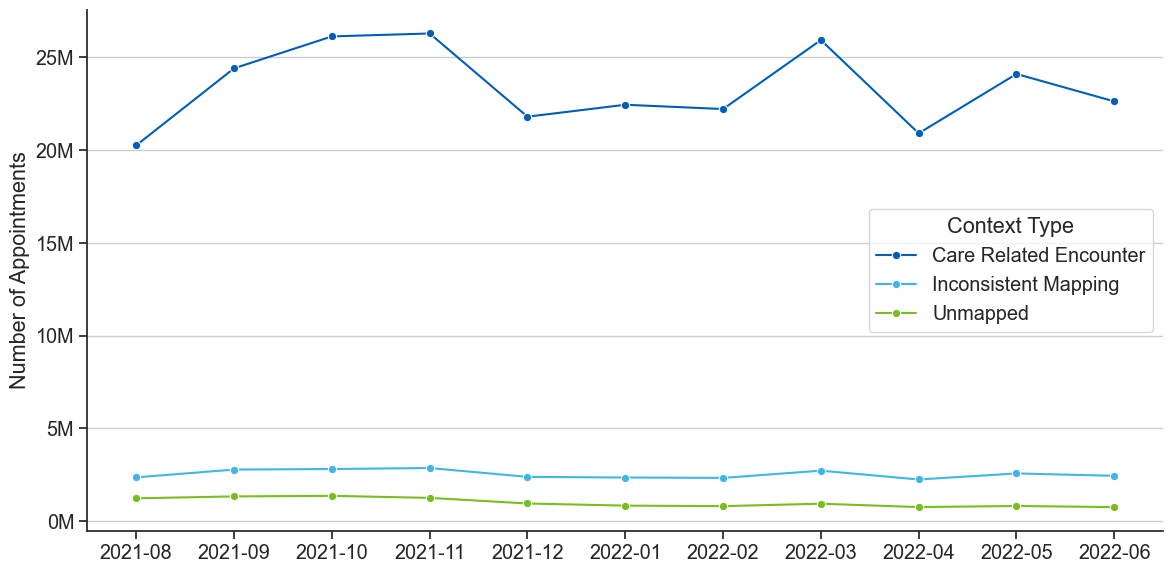

In [102]:
default_style()

# Create a lineplot
ax = sns.lineplot(data=nc_ct,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='context_type',
                  errorbar=None,
                  marker='o')

# Set axis labels
ax.set(xlabel=None,
       ylabel='Number of Appointments')

# Format legend
plt.legend(title='Context Type')

# Format axis
mil_y()

plt.tight_layout()
plt.show()

# National Categories analysis

### National Categories over time

In [105]:
# Create a separate data set that that aggregates appointments by national categories. 
nc_nc = nc2.groupby(['appointment_month', 'national_category'])\
    [['count_of_appointments']].sum().reset_index().copy()

nc_nc.head(20)

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
5,2021-08,Group Consultation and Group Education,5161
6,2021-08,Home Visit,165061
7,2021-08,Inconsistent Mapping,2363093
8,2021-08,Non-contractual chargeable work,10775
9,2021-08,Patient contact during Care Home Round,31316


<Axes: xlabel='count_of_appointments', ylabel='national_category'>

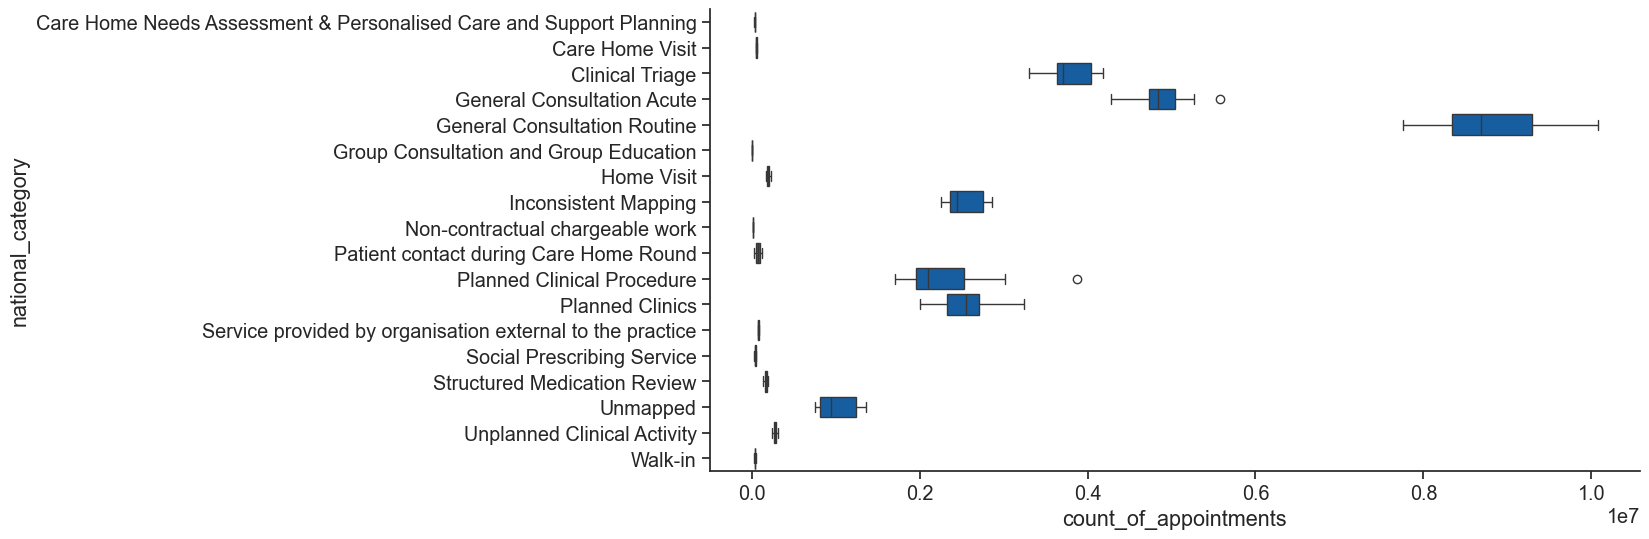

In [106]:
# View outliers using a boxplot
sns.boxplot(data=nc_nc,
           y='national_category',
           x='count_of_appointments')

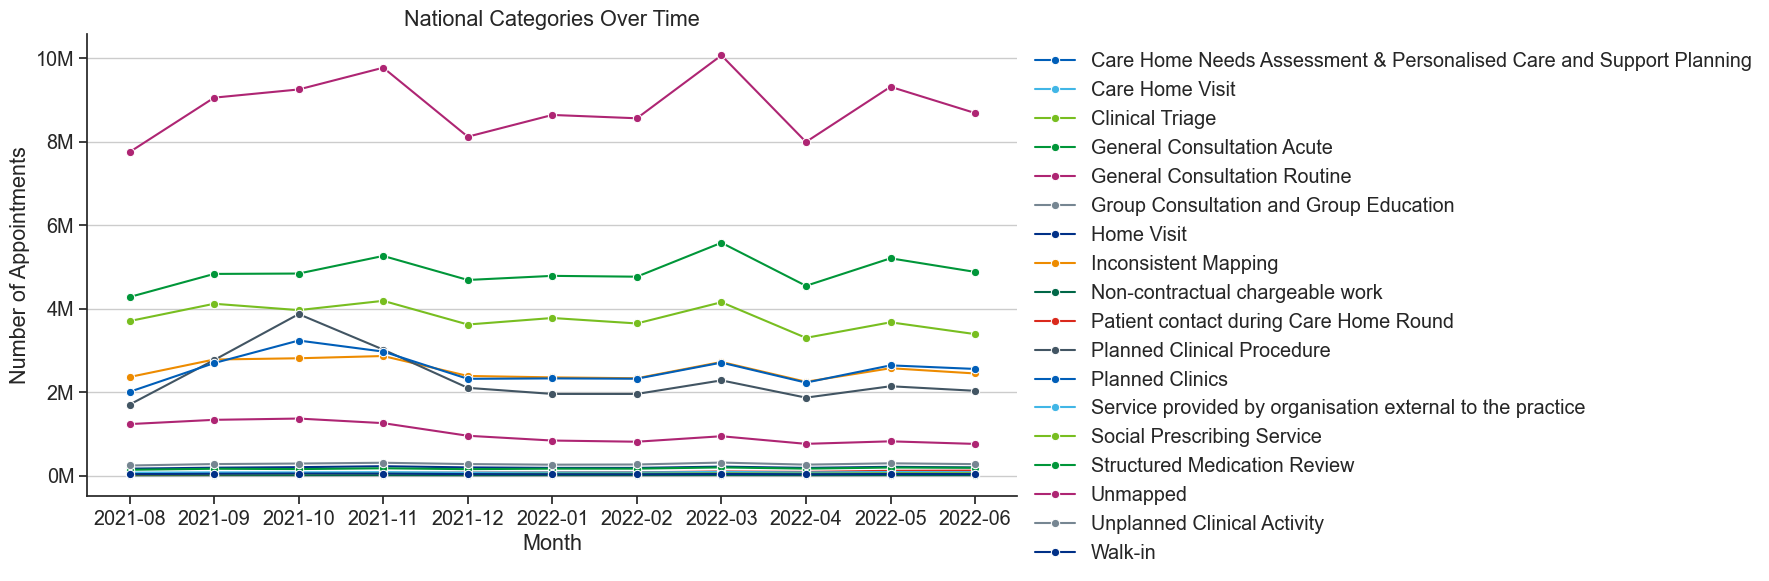

In [107]:
# Create a lineplot
ax = sns.lineplot(data=nc_nc,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='national_category',
                  errorbar=None,
                  marker='o',
                  palette=nhs_cols)

# Set title and axis labels
ax.set(title='National Categories Over Time',
       xlabel='Month',
       ylabel='Number of Appointments')

# Set legend outside of chart
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Format axis
mil_y()

plt.show()

### Simplifying National Catgories: Top 5
*Filtering the above data set as the visualisation contains too many lines to read clearly*

In [109]:
# Create a list of top five categories (based on rel_freq function earlier)
nc_keep = ['General Consultation Routine', 'General Consultation Acute',
           'Clinical Triage', 'Planned Clinics', 'Planned Clinical Procedure']

# Create a new subset based on this list
nc_filter = nc_nc[nc_nc['national_category'].isin(nc_keep)]

nc_filter.head()

,appointment_month,national_category,count_of_appointments
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
10,2021-08,Planned Clinical Procedure,1701814
11,2021-08,Planned Clinics,2007880


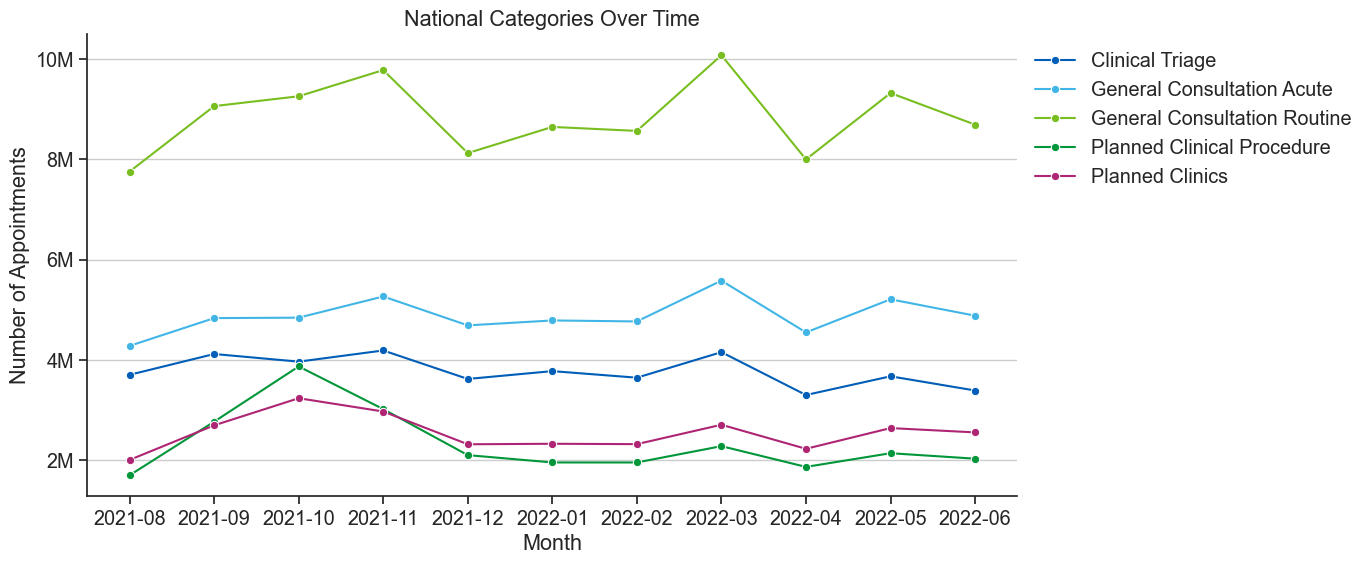

In [110]:
# Create a lineplot
ax = sns.lineplot(data=nc_filter,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='national_category',
                  errorbar=None,
                  marker='o',
                  palette=nhs_cols)

# Set title and axis labels
ax.set(title='National Categories Over Time',
       xlabel='Month',
       ylabel='Number of Appointments')

# Set legend outside of chart
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Format axis
mil_y()

plt.show()

#

# Service Settings analysis

### Service settings over time

In [114]:
# Aggregate appts by month and service setting
nc_ss = nc2.groupby(['appointment_month', 'service_setting'])\
    [['count_of_appointments']].sum().reset_index().copy()

nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


<Axes: xlabel='count_of_appointments', ylabel='service_setting'>

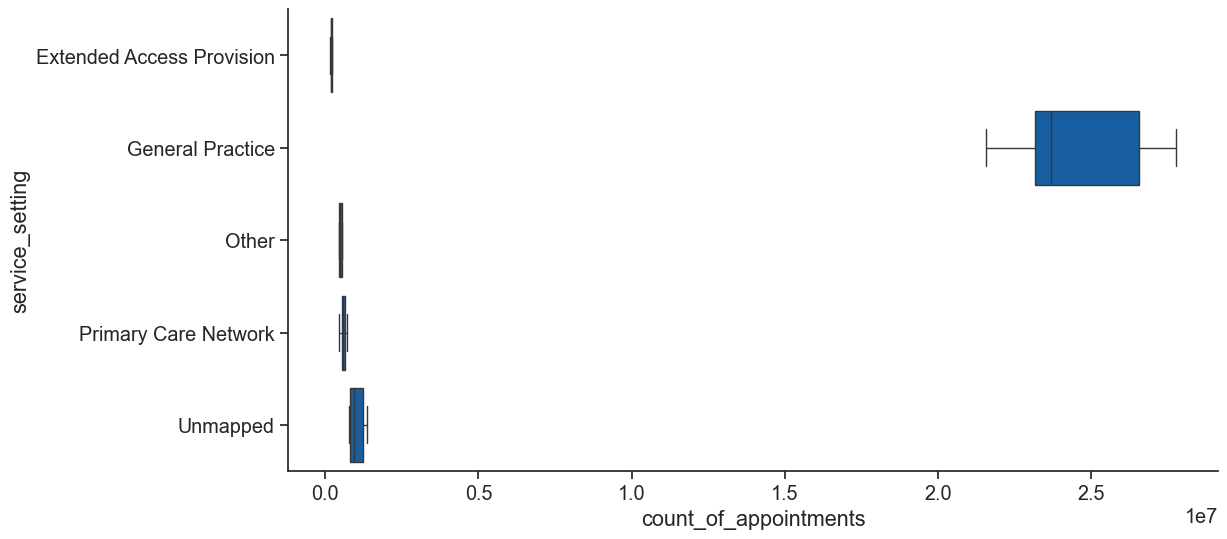

In [115]:
# View outliers using a boxplot
sns.boxplot(data=nc_ss,
           y='service_setting',
           x='count_of_appointments')

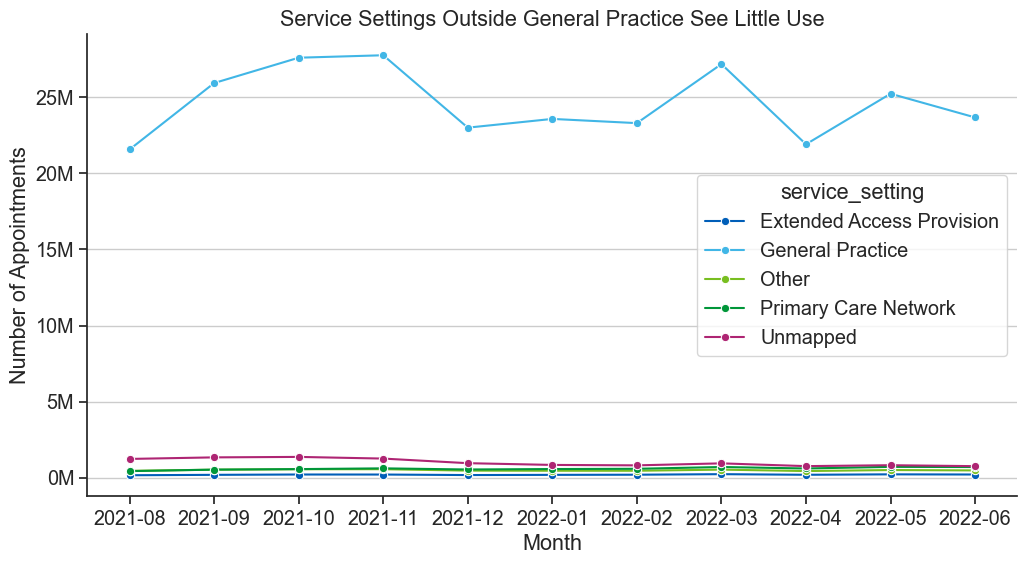

In [116]:
# Plot the appointments over the available date range
ax = sns.lineplot(data=nc_ss,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='service_setting',
                  marker='o',
                  errorbar=None)

# Set title and axis labels
ax.set(title='Service Settings Outside General Practice See Little Use',
       xlabel = 'Month',
       ylabel = 'Number of Appointments')

# Format y axis
mil_y()

plt.show()

### Service setting by day of week

In [118]:
# Create a DataFrame grouping average use of service setting per day of week
nc_ss_days = nc2.groupby(['day', 'service_setting'])\
    [['count_of_appointments']].sum().reset_index().copy()

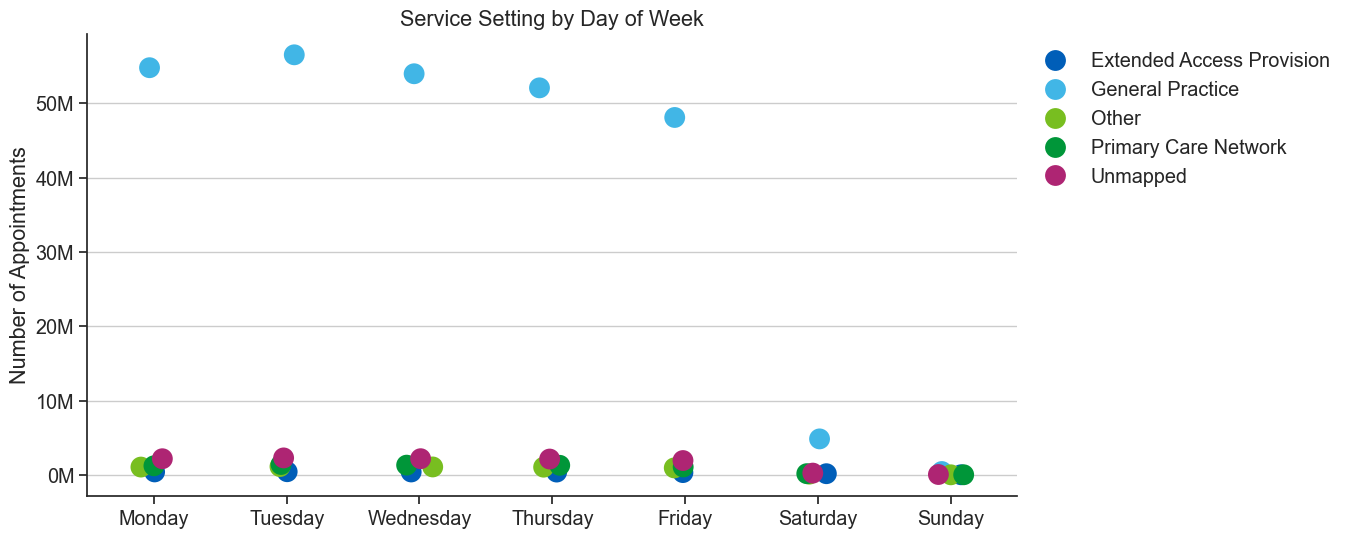

In [119]:
default_style()

# Specify order for plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot appointment settings by day of week
ax = sns.stripplot(data=nc_ss_days,
                   x='day',
                   y='count_of_appointments',
                   hue='service_setting',
                   size=15,
                   jitter=True,
                   order=day_order)

# Set title and axis labels
ax.set(title='Service Setting by Day of Week',
       xlabel=None,
       ylabel = 'Number of Appointments')

# Format legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title=None)

# Format y axis
mil_y()

plt.show()

**Observations**
- Viewing service settings filtered by season is of limited utility as seasonal patterns are not detectable 
- Service setting does not appear to vary by day of week

#

# Overall appointment volume

### Appointment volume over time

In [124]:
# Aggregate ar data set by month
ar_agg = ar2.groupby('appointment_month')\
    [['count_of_appointments']].sum().reset_index().copy()

# Set appointment_month as string for easier charting 
ar_agg['appointment_month'] = ar_agg['appointment_month']\
    .astype(str)\
    .str[:-3]     # Removes day characters from end of appointment_month

ar_agg.head(3)

,appointment_month,count_of_appointments
0,2020-01,27191758
1,2020-02,24097066
2,2020-03,24039635


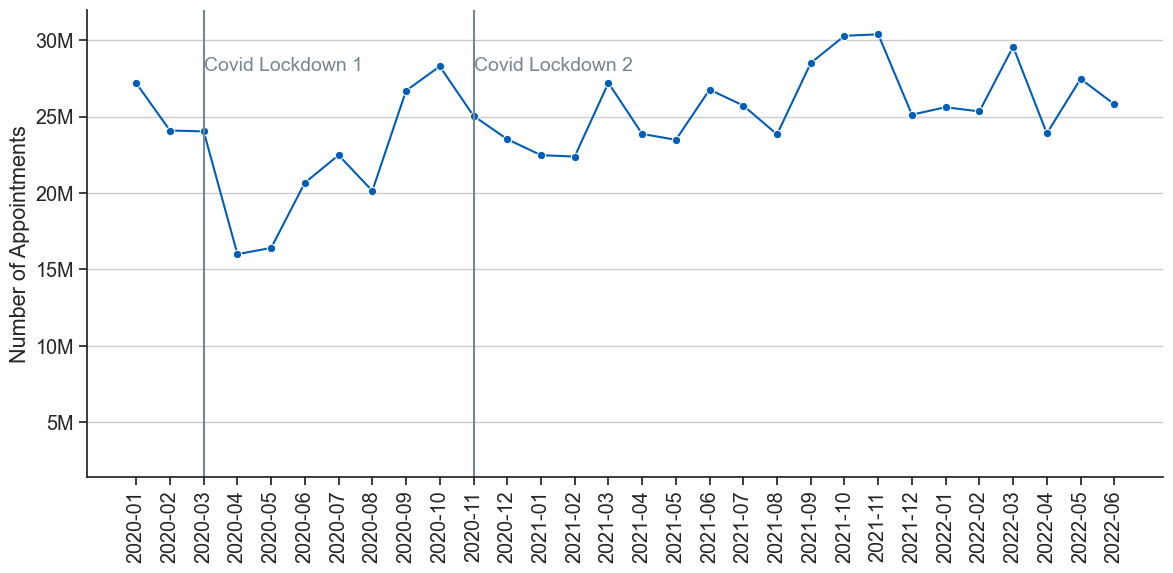

In [125]:
# Create a lineplot.
ax = sns.lineplot(data=ar_agg,
                  x='appointment_month',
                  y='count_of_appointments',
                  errorbar=None,
                  marker='o',
                  color='#005EB8')

# Add lines to show Covid lockdowns
ax.axvline(x='2020-03', color='#768692')
plt.text(x='2020-03', y=28000000, s='Covid Lockdown 1', fontsize=14, color='#768692')
ax.axvline(x='2020-11', color='#768692')
plt.text(x='2020-11', y=28000000, s='Covid Lockdown 2', fontsize=14, color='#768692')

# Set title and axis labels
ax.set(xlabel=None,
       ylabel='Number of Appointments')

# Set x labels and format
ax.set_xticklabels(ar_agg['appointment_month'].unique(), rotation=90)

# Format y labels
plt.ylim(1400000, 32000000)
mil_y()

plt.tight_layout()
plt.show()

**Heatmap of volume over time (exploratory visualisation)**

In [127]:
# Create a new subset with month and year split out
ar_datesplit = ar2.groupby(['year', 'month', 'month_name'])[['count_of_appointments']].sum()\
    .reset_index().copy()

# Pivot the data
ar_piv = ar_datesplit.pivot_table(index='month', columns='year', values='count_of_appointments')

ar_piv.head()

year,2020,2021,2022
month,,,
1,27191758.0,22482990.0,25623928.0
2,24097066.0,22389461.0,25344812.0
3,24039635.0,27216974.0,29586020.0
4,16002488.0,23872938.0,23904960.0
5,16410591.0,23488728.0,27478652.0


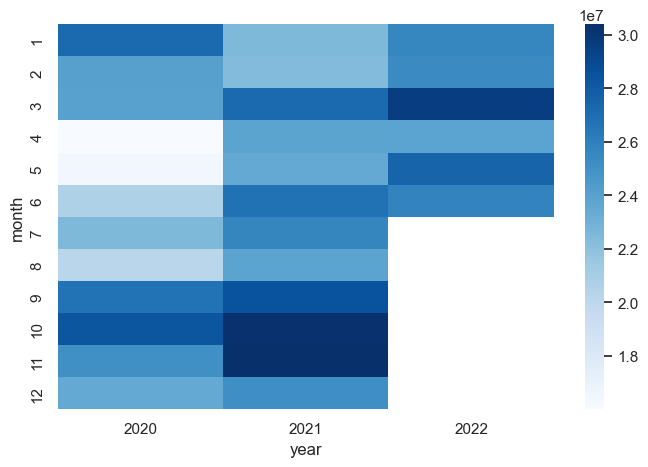

In [128]:
# Change figure size 
sns.set(rc={'figure.figsize':(8, 5)})
sns.set_style('white')

# Plot the heatmap
sns.heatmap(data=ar_piv, cmap='Blues')

plt.show()

**Observations:**
- Appointment volume appears to be increasing over time. A YoY chart (below) may show this more clearly.
- Heatmap does not show this data as effectively as lineplot

### YoY changes

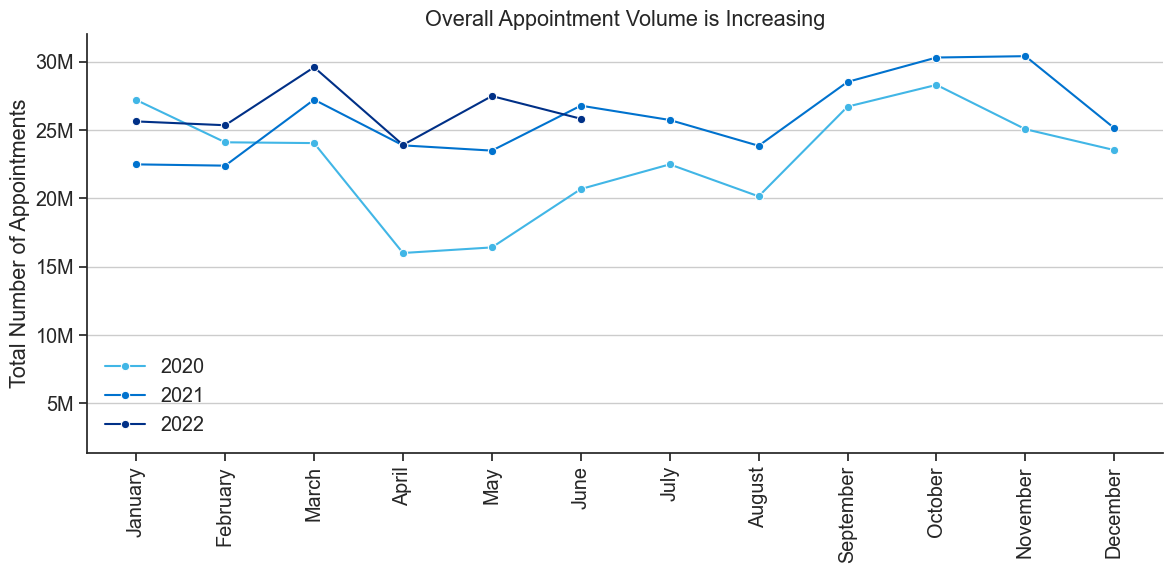

In [131]:
default_style()

# Plot data
ax = sns.lineplot(data=ar_datesplit,
                  x='month_name',
                  y='count_of_appointments',
                  hue='year',
                  palette=['#41B6E6', '#0072CE', '#003087'],
                  marker='o')

# Set title and axis labels
ax.set(xlabel=None,
       ylabel='Total Number of Appointments',
       title='Overall Appointment Volume is Increasing')

# Format legend
ax.legend(frameon=False)

# Format y axis
plt.ylim(1400000, 32000000)
mil_y()

# Format x axis
ax.set_xticklabels(ar_datesplit['month_name'].unique(), rotation=90)

plt.tight_layout()
plt.show()

**Observation:** This chart better shows increase in volume over time.

### Volume by Season - busiest months

In [134]:
# View top 5 busiest months
ar_agg.sort_values(by='count_of_appointments', ascending=False).head(10)

,appointment_month,count_of_appointments
22,2021-11,30395923
21,2021-10,30296850
26,2022-03,29586020
20,2021-09,28514685
9,2020-10,28296051
28,2022-05,27478652
14,2021-03,27216974
0,2020-01,27191758
17,2021-06,26775653
8,2020-09,26706462


**Observation:** Above list confirms autumn months (September-November) tend to be highest volume for appointments

#

### Daily volume against daily capacity benchmark of 1.2 million

In [138]:
# Total appoitments by day across the entire nc time period
# Month and day are included for possible use of this DataFrame in other charts
appts_by_day = nc2.groupby(['appointment_month', 'appointment_date', 'day'])[['count_of_appointments']]\
    .sum().reset_index().copy()

# Add column to indicate if volume > 1.2M/day
appts_by_day['benchmark'] = appts_by_day['count_of_appointments'] > 1200000

print(appts_by_day.shape)
appts_by_day.head(10)

(334, 5)


,appointment_month,appointment_date,day,count_of_appointments,benchmark
0,2021-08,2021-08-01,Sunday,5627,False
1,2021-08,2021-08-02,Monday,1222768,True
2,2021-08,2021-08-03,Tuesday,1169920,False
3,2021-08,2021-08-04,Wednesday,1093532,False
4,2021-08,2021-08-05,Thursday,1074043,False
5,2021-08,2021-08-06,Friday,1032165,False
6,2021-08,2021-08-07,Saturday,26245,False
7,2021-08,2021-08-08,Sunday,5173,False
8,2021-08,2021-08-09,Monday,1223650,True
9,2021-08,2021-08-10,Tuesday,1167188,False


#### What % of days was the NHS over capacity?

In [140]:
# Determine how many days NHS was over capacity
appts_by_day['benchmark'].value_counts() 

benchmark
True     175
False    159
Name: count, dtype: int64

In [141]:
# Determine how many WEEDKAYS the NHS was over capacity
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

appts_by_weekday = appts_by_day[appts_by_day['day']\
    .isin(weekdays)].reset_index().copy()

appts_by_weekday['benchmark'].value_counts() 

benchmark
True     175
False     64
Name: count, dtype: int64

In [142]:
# Determine what percentage of days NHS was over and under capacity
print("How often was the NHS above its GP capacity target?")
print()
# All days evaluation
print("All days including weekends:")
print(f"Over capacity: {round(175/(175+159)*100)}%")
print(f"Under capacity: {round(159/(175+159)*100)}%")
print()
# Weekday evaluation
print("Weekdays (M-F):")
print(f"Over capacity: {round(175/(175+64)*100)}%")
print(f"Under capacity: {round(64/(175+64)*100)}%")

How often was the NHS above its GP capacity target?

All days including weekends:
Over capacity: 52%
Under capacity: 48%

Weekdays (M-F):
Over capacity: 73%
Under capacity: 27%


**Observation:** The NHS was over capacity over 50% of days during this reporting period

#### Visualise % of days over capacity with actual day counts (not averaged out)

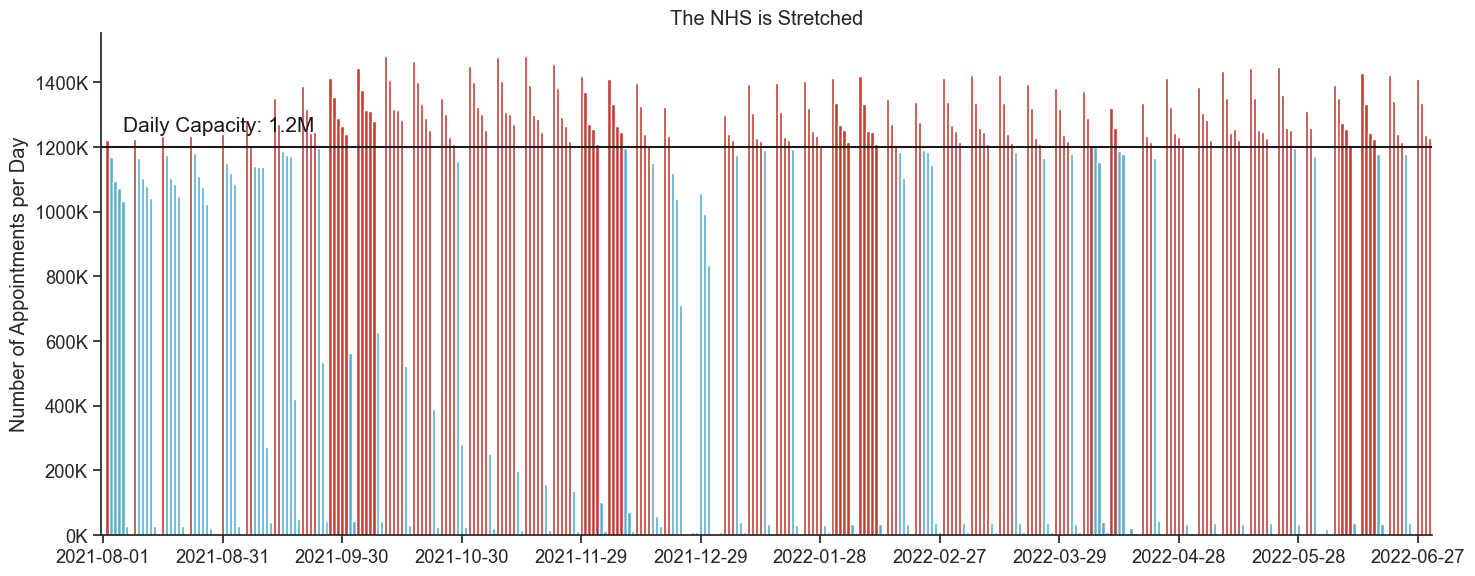

In [145]:
# Reset the figure size and style for more control
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.2)
sns.set_style('ticks', {'axes.spines.top': False,
                        'axes.spines.right': False})

ax = sns.barplot(data=appts_by_day,
                 x='appointment_date',
                 y='count_of_appointments',
                 hue='benchmark',
                 palette=['#41B6E6', '#DA291C'],
                 legend=False)

# Add a line to show daily capacity
plt.axhline(y=1200000, color='k', linestyle='solid')
plt.text(x=5, y=1250000, s="Daily Capacity: 1.2M", fontsize=15, color='k')

# Set title and axes labels
ax.set(title='The NHS is Stretched',
       xlabel=None,
       ylabel='Number of Appointments per Day')

# Set x axis values
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

# Format y axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.savefig('daily_capacity.png')
plt.show()

#

#### Daily average by Month vs. capacity benchmark
Daily average calculation = monthly sum / 22 (max avg number of weekdays in a month) because 98% of appointments occur on weekdays.

In [148]:
# Calculate avg daily appointment volume per month
ar_agg['daily_avg'] = (ar_agg['count_of_appointments']/22)

# Add a column for above or below benchmark
ar_agg['benchmark'] = ar_agg['daily_avg'] > 1200000

ar_agg.head()

,appointment_month,count_of_appointments,daily_avg,benchmark
0,2020-01,27191758,1.235989e+06,True
1,2020-02,24097066,1.095321e+06,False
2,2020-03,24039635,1.092711e+06,False
3,2020-04,16002488,7.273858e+05,False
4,2020-05,16410591,7.459360e+05,False


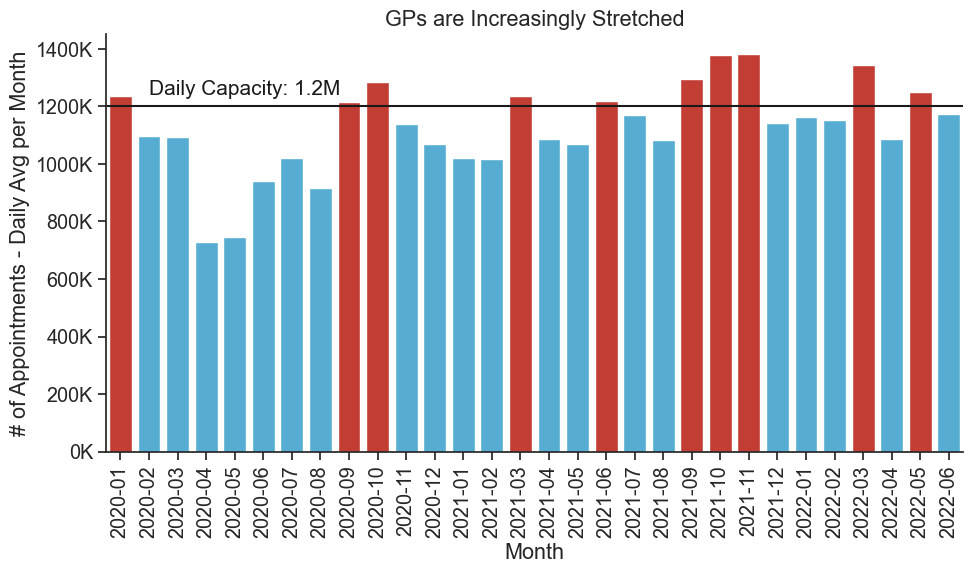

In [149]:
pptx_style()

ax = sns.barplot(data=ar_agg,
                 x='appointment_month',
                 y='daily_avg',
                 hue='benchmark',
                 palette=['#41B6E6', '#DA291C'],
                 legend=False)

# Add a line to show daily capacity
plt.axhline(y=1200000, color='k', linestyle='solid')
plt.text(x=1, y=1240000, s="Daily Capacity: 1.2M", fontsize=15, color='k')

# Set title and axes labels
ax.set(title='GPs are Increasingly Stretched',
       xlabel='Month',
       ylabel='# of Appointments - Daily Avg per Month')

# Format y axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Format x axis
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('capacity_avg.png')
plt.show()

**Observations**
- When averaging daily capacity by month, GPs exceed capacity 10 of the past 30 months and 5 of the past 11 months.
- However, this can obscure daily pressure - when looking at actual daily volume for the past 11 months, GPs are over capacity 52% of all days and 73% of weekdays.

# Day of Week patterns

In [152]:
# Return relative frequency of weekdays
rel_freq(appts_by_day, 'day')

Number of unique values for day: 7

Percentage (%) of total appointments for each:


,day,% of appts
0,Tuesday,20.877422
1,Monday,20.164134
2,Wednesday,19.923968
3,Thursday,19.245727
4,Friday,17.698172
5,Saturday,1.883122
6,Sunday,0.207454


**Purpose of below:** View shape of appointment counts by day to decide whether to use mean or median

(47, 5)

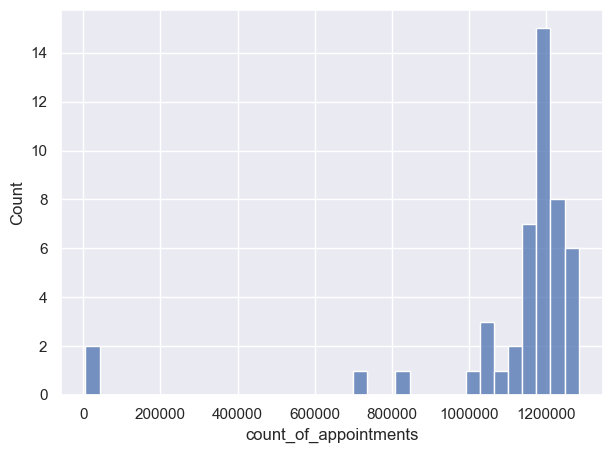

In [154]:
# Set figure a smaller size
sns.set(rc={'figure.figsize':(7, 5)})

# Create an individual day variable
day = appts_by_day[appts_by_day['day'] == 'Friday']

# Plot day distribution
sns.histplot(data=day, x='count_of_appointments')

# Force standard notation in axis
plt.ticklabel_format(style='plain', axis='x')

day.shape

**Note: Using median below as histograms show outliers. Median seems to better reflect the 'typical week'.**

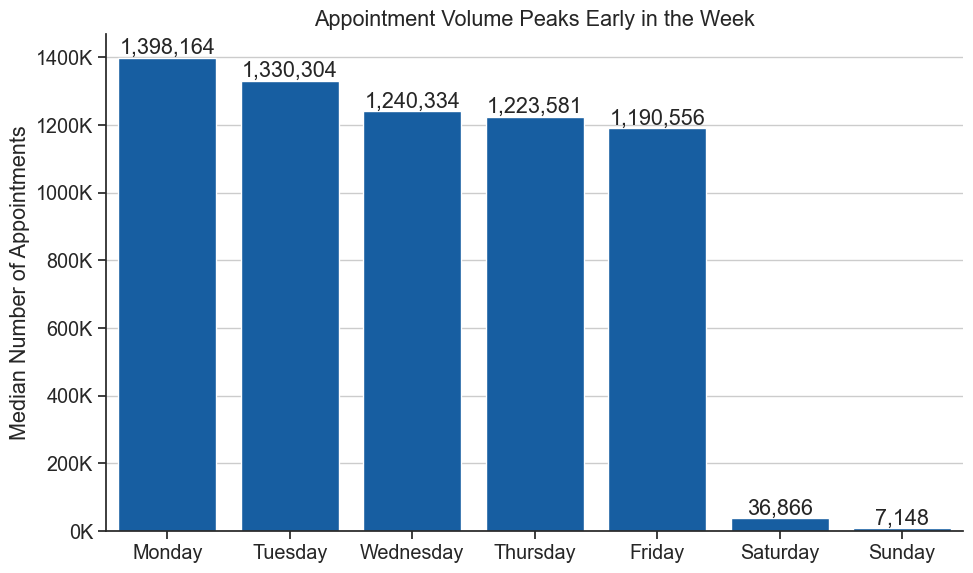

In [156]:
pptx_style()

# Plot average appointments by day
ax = sns.barplot(data=appts_by_day,
                 x='day',
                 y='count_of_appointments',
                 order=day_order,
                 estimator='median',
                 errorbar=None)

# Set title and axis labels
ax.set(title='Appointment Volume Peaks Early in the Week',
       xlabel=None,
       ylabel='Median Number of Appointments')

# Add data labels
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}')

# Format y axis
thou_y()

plt.tight_layout()
plt.savefig('weekdays.png')
plt.show()

### Determine what percentage of each day of week is over 1.2M capacity

In [158]:
# Add a binary column for over capacity
appts_by_day['binary_benchmark'] = appts_by_day['benchmark'].map({True : 1, False: 0})

# Group by day
weekday_capacity = appts_by_day.groupby('day')[['binary_benchmark']].sum().reset_index().copy()

# Create a column for percentage of days that are over capacity 
weekday_capacity['percent_over'] = (weekday_capacity['binary_benchmark'] / 48) * 100

weekday_capacity

,day,binary_benchmark,percent_over
0,Friday,19,39.583333
1,Monday,43,89.583333
2,Saturday,0,0.000000
3,Sunday,0,0.000000
4,Thursday,34,70.833333
5,Tuesday,43,89.583333
6,Wednesday,36,75.000000


**Observation:** Appontment volume is highest at the beginning of the week. It plummets on the weekend.

#

# Appointment Mode analysis

### Mode pattern over time

In [163]:
# Aggregate ar data set by month and appointment mode
ar_am = ar2.groupby(['appointment_month', 'appointment_mode'])[['count_of_appointments']]\
    .sum().reset_index().copy()

# Set appointment_month as object for easier charting 
ar_am['appointment_month'] = ar_am['appointment_month']\
    .astype(str)\
    .str[:-3]     # Removes 'day' characters from end of date

ar_am.head(3)

,appointment_month,appointment_mode,count_of_appointments
0,2020-01,Face-to-Face,21730843
1,2020-01,Home Visit,265092
2,2020-01,Telephone,3699600


<Axes: xlabel='count_of_appointments', ylabel='appointment_mode'>

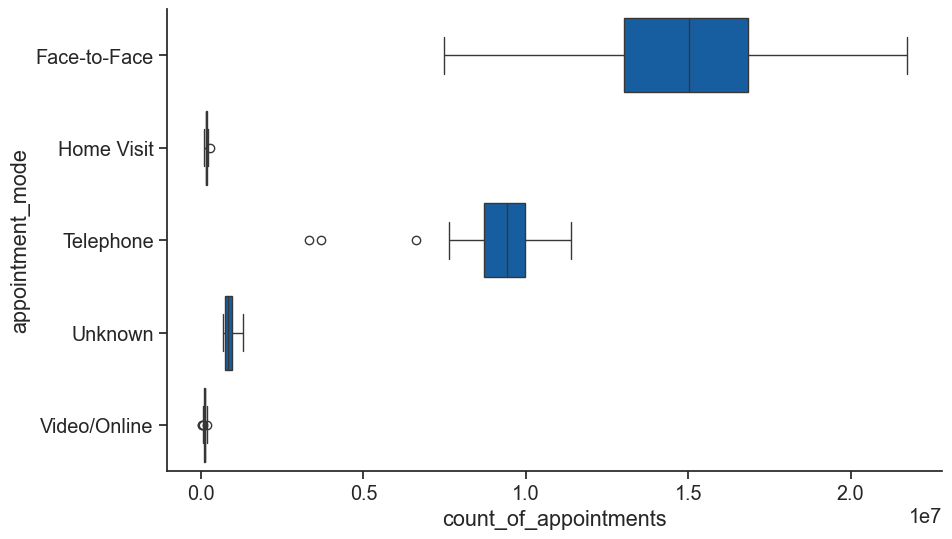

In [164]:
# View outliers using a boxplot
sns.boxplot(data=ar_am,
            y='appointment_mode',
            x='count_of_appointments')

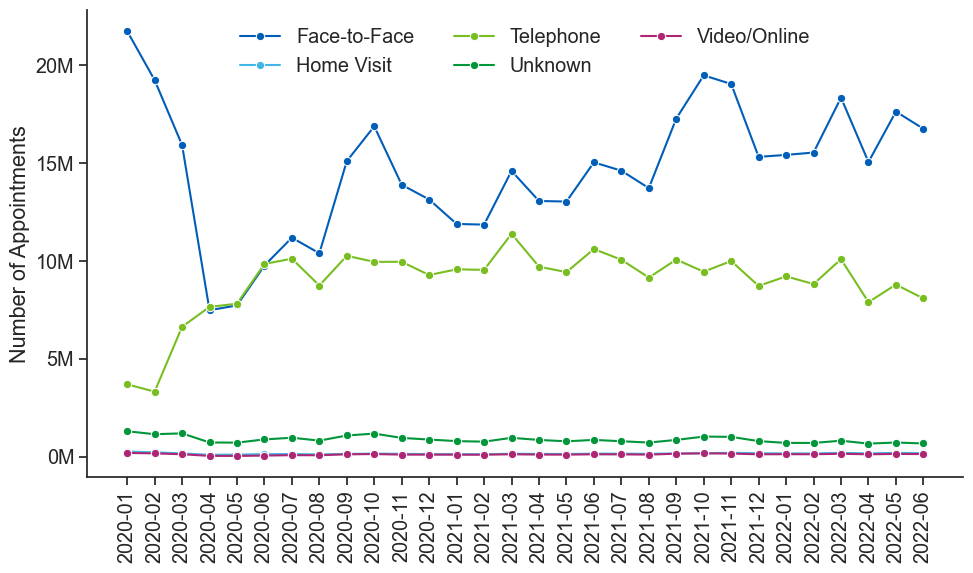

In [165]:
pptx_style()

# Plot the appointments over time.
ax = sns.lineplot(data=ar_am,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='appointment_mode',
                  errorbar=None,
                  marker='o')

# Add lines to show Covid lockdowns
# ax.axvline(x='2020-03', color='#768692')
# plt.text(x='2020-03', y=20000000, s='Covid Lockdown 1', fontsize=14, color='#768692')
# ax.axvline(x='2020-11', color='#768692')
# plt.text(x='2020-11', y=20000000, s='Covid Lockdown 2', fontsize=14, color='#768692')

# Format x labels
ax.set_xticklabels(ar_am['appointment_month'].unique(), rotation=90
                  )

# Set title and axis labels
ax.set(xlabel=None,
       ylabel='Number of Appointments')

# Set legend position and format and remove title
plt.legend(loc='upper center', 
           frameon=False, title=None,
           ncols=3)

# Format y axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.savefig('mode.png')
plt.show()

**Observation:** Telephone appointments became more commonplace during Covid and have stayed high since 
(though signs that they may be on the decline more recently)

### Mode by Region

In [168]:
# Create a pivot table by region
# Aggregate ar data set by region and mode
region_mode = ar2.groupby(['region', 'appointment_mode'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Aggregate ar data set by region only
ar_region_totals = ar2.groupby(['region'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Merge in region totals to mode-by-region totals
reg_mode = pd.merge(region_mode, ar_region_totals, on='region', how='left')\
    .rename(columns={'count_of_appointments_x' : 'mode_count', 'count_of_appointments_y' : 'reg_total'})

# Determine percent of region total for each mode
reg_mode['percent_of_total'] = (reg_mode['mode_count'] / reg_mode['reg_total'] * 100)

# Pivot to see the result easier
reg_mode_piv = pd.pivot_table(data=reg_mode, 
                              index='region', 
                              columns='appointment_mode', 
                              values='percent_of_total')

# Sort values by highest % of Telephone use (for charting)
reg_mode_piv = reg_mode_piv.sort_values(by='Telephone', ascending=False)

reg_mode_piv

appointment_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online
region,,,,,
London,53.491666,0.391318,42.056824,3.362684,0.697508
South East,56.746696,0.766714,38.618017,3.560953,0.307620
North West,56.116769,1.361675,38.460769,3.833832,0.226955
Midlands,59.629887,0.661940,36.224602,3.051690,0.431880
South West,60.764498,0.603238,33.574981,4.683899,0.373385
North East and Yorkshire,64.280917,0.485402,31.621707,3.032296,0.579679
East of England,63.660920,0.372960,31.137252,4.038115,0.790754


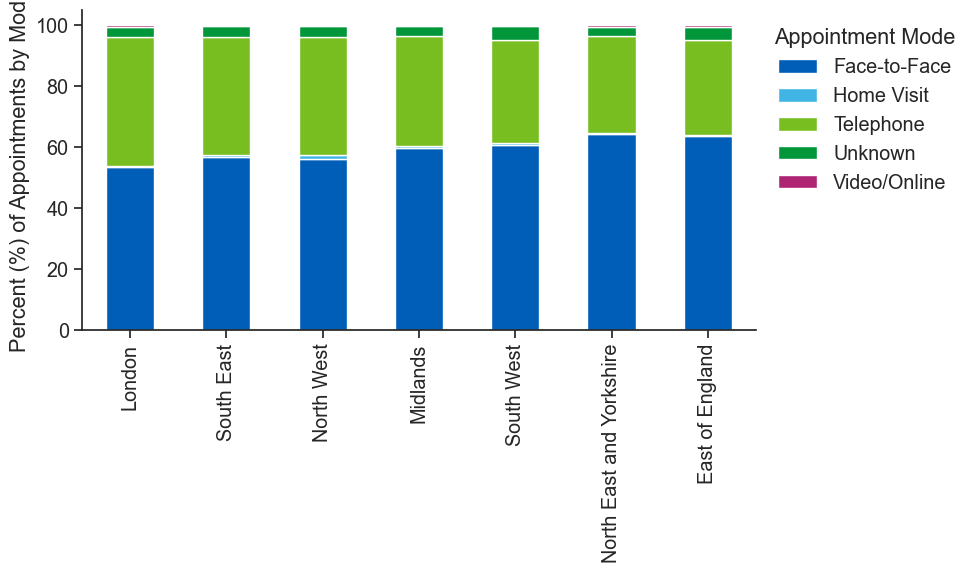

In [169]:
pptx_style()

# Create a stacked bar by region
ax = reg_mode_piv.plot(kind='bar', stacked=True)

# Set title and axis labels
ax.set(xlabel = None,
       ylabel = 'Percent (%) of Appointments by Mode')

# Format x-axis labels
ax.set_xticklabels(reg_mode_piv.index, rotation=90)

# Format legend
plt.legend(bbox_to_anchor=(1,1), 
           frameon=False, title='Appointment Mode')

plt.tight_layout()
plt.savefig('mode_region.png')
plt.show()

**Observation:** Phone-appointment-adoption varies by region

### Appointment mode - telephone only
It is difficult to see the disparity in the stacked bar chart, so the below has been created to show the pattern of remote appointments by region more clearly

In [172]:
# Create just a bar chart of remote appointments by region
# Add a column for total remote appointment %
reg_mode_piv['Remote'] = reg_mode_piv['Telephone'] + reg_mode_piv['Video/Online']

# Create a subset of remove appointment % only
reg_remote = reg_mode_piv[['Remote']].sort_values(by='Remote', ascending=False).copy()

reg_remote

appointment_mode,Remote
region,
London,42.754332
South East,38.925636
North West,38.687724
Midlands,36.656482
South West,33.948366
North East and Yorkshire,32.201386
East of England,31.928005


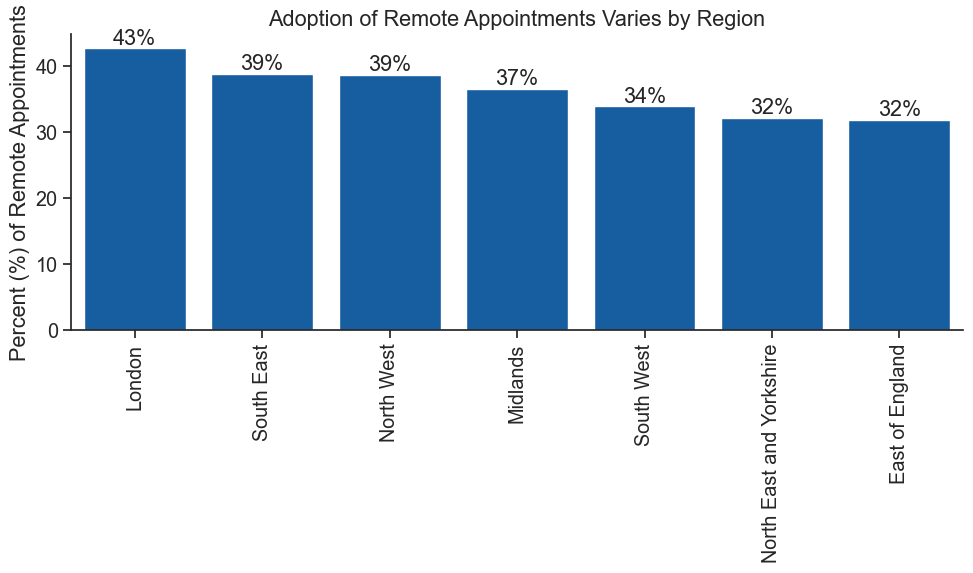

In [173]:
# Plot percent of remote appointments
ax = sns.barplot(data=reg_remote, 
                 x='region', 
                 y='Remote')

# Set title and axis labels
ax.set(xlabel = None,
                ylabel = 'Percent (%) of Remote Appointments',
                title = 'Adoption of Remote Appointments Varies by Region')

ax.set_xticklabels(reg_remote.index, rotation=90)

# Set data labels
for i in ax.containers:
   ax.bar_label(i, fmt='%.0f%%')

plt.tight_layout()
plt.show()

### Mode by HCP Type

In [175]:
# Group by HCP type and mode
hcp_mode = ar2.groupby(['hcp_type', 'appointment_mode'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Determine HCP Type totals
hcp_total = ar2.groupby(['hcp_type'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Merge in totals
hcp_mode_merge = pd.merge(hcp_mode, hcp_total, on='hcp_type', how='left')\
    .rename(columns={'count_of_appointments_x' : 'mode_count', 
                     'count_of_appointments_y' : 'hcp_total'})

# Calculate percent of total
hcp_mode_merge['percent_of_total'] = (hcp_mode_merge['mode_count'] / hcp_mode_merge['hcp_total']) * 100

# Pivot for charting
hcp_mode_piv = pd.pivot_table(data=hcp_mode_merge, index='hcp_type', columns='appointment_mode', values='percent_of_total')

hcp_mode_piv

appointment_mode,Face-to-Face,Home Visit,Telephone,Unknown,Video/Online
hcp_type,,,,,
GP,47.655305,0.504086,49.800366,1.547954,0.492289
Other Practice staff,74.921651,0.649221,21.880615,2.036593,0.511921
Unknown,19.724342,3.115977,18.974723,58.160406,0.024552


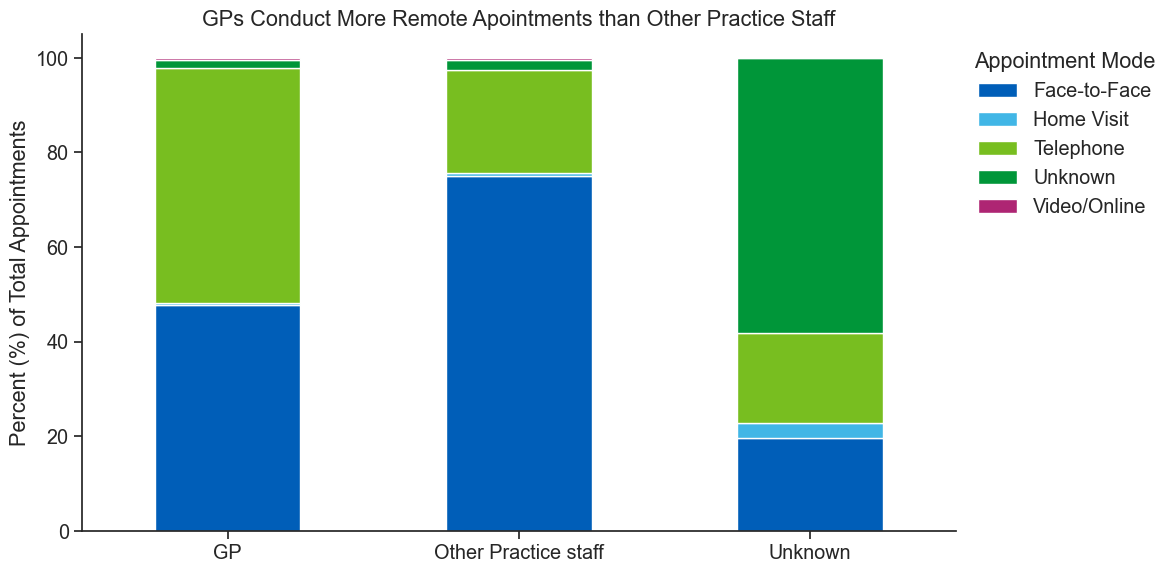

In [176]:
default_style()

# Create a stacked bar by HCP type
ax = hcp_mode_piv.plot(kind='bar', 
                       stacked=True)

# Set title and axis labels
ax.set(xlabel = None,
       ylabel = 'Percent (%) of Total Appointments',
       title = 'GPs Conduct More Remote Apointments than Other Practice Staff')

# Format x-axis labels
ax.set_xticklabels(hcp_mode_piv.index, rotation=0)

# Format legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False, title='Appointment Mode')

plt.tight_layout()
plt.savefig('mode_hcp.png')
plt.show()

**Observation:** A higher portion of GP appointments are conducted remotely vs. other practice staff.

#

# HCP Type analysis

### HCP Type over time

In [181]:
# Group ar by month and HCP type
hcp_timeline = ar2.groupby(['appointment_month', 'hcp_type'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Convert date to string
hcp_timeline['appointment_month'] = hcp_timeline['appointment_month'].astype(str)\
    .str[:-3]     # Removes last 3 characters from appointment_month

hcp_timeline.head()

,appointment_month,hcp_type,count_of_appointments
0,2020-01,GP,14166016
1,2020-01,Other Practice staff,12323161
2,2020-01,Unknown,702581
3,2020-02,GP,12465443
4,2020-02,Other Practice staff,10999127


<Axes: xlabel='count_of_appointments', ylabel='hcp_type'>

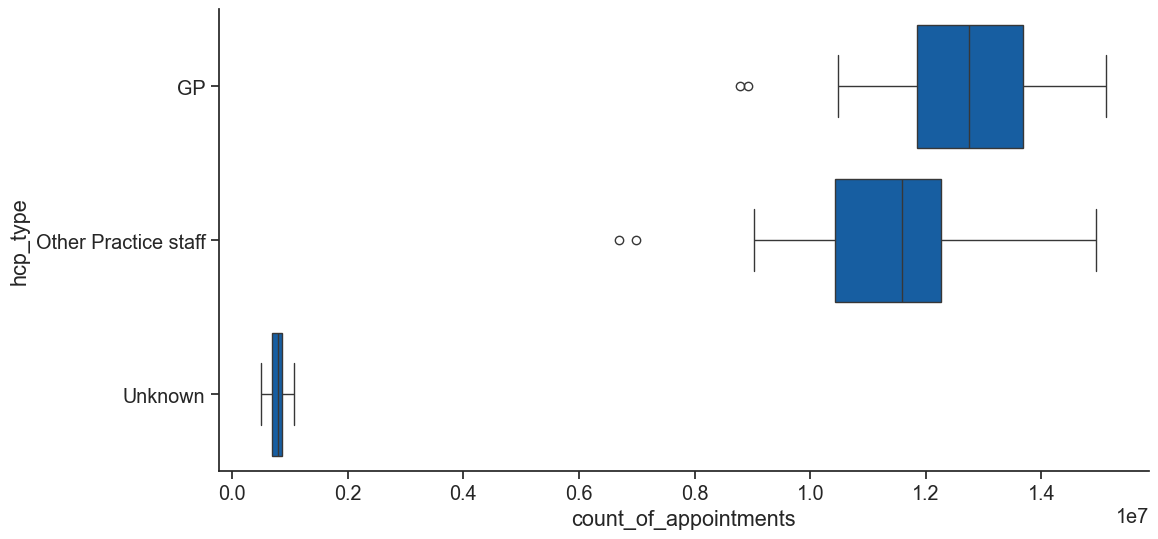

In [182]:
# View outliers using a boxplot
sns.boxplot(data=hcp_timeline,
            y='hcp_type',
            x='count_of_appointments')

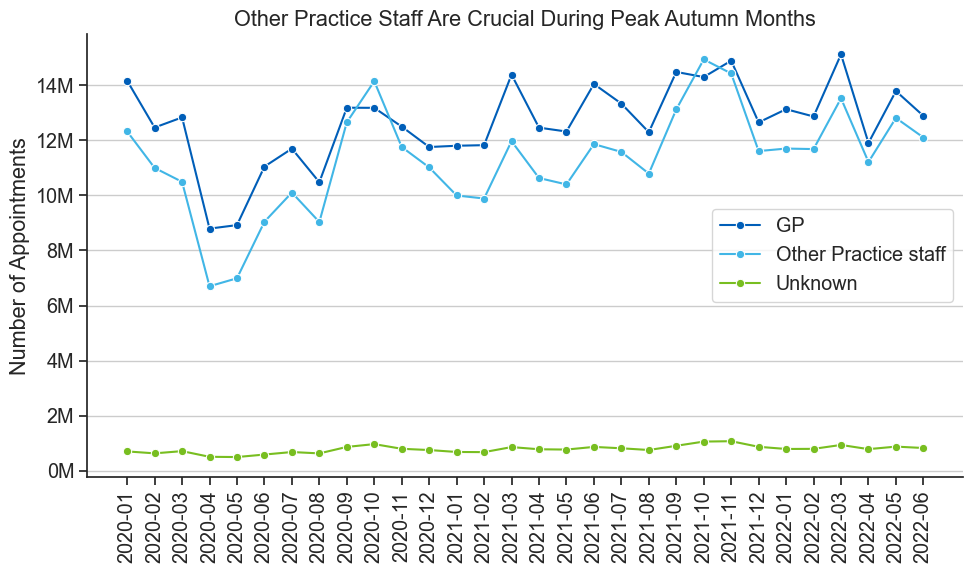

In [183]:
pptx_style()

# Plot over time
ax = sns.lineplot(data=hcp_timeline,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='hcp_type',
                  marker='o')

# Set title and axis labels
ax.set(title='Other Practice Staff Are Crucial During Peak Autumn Months',
       xlabel=None,
       ylabel='Number of Appointments')

# Format x labels
ax.set_xticklabels(hcp_timeline['appointment_month'].unique(), rotation=90)

# Format y axis
mil_y()

# Format legend
plt.legend(title=None)

plt.tight_layout()
plt.savefig('hcp.png')
plt.show()

**Observation:** During the busiest months, Other Practice Staff see more patients than GPs.

#

# Appointment Status (DNA)
*See function dna_breakdown() at top of this notebook*

### DNA over time

In [188]:
# Subset appointments by month and filter for DNA status
status_over_time = ar2[ar2['appointment_status'] == 'DNA']\
    .groupby(['appointment_month', 'year', 'month_name', 'appointment_status'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Format appointment month as string
status_over_time['appointment_month'] = status_over_time['appointment_month']\
    .astype(str).str[:-3]

status_over_time.head()

,appointment_month,year,month_name,appointment_status,count_of_appointments
0,2020-01,2020,January,DNA,1296082
1,2020-02,2020,February,DNA,1213091
2,2020-03,2020,March,DNA,1163765
3,2020-04,2020,April,DNA,477102
4,2020-05,2020,May,DNA,447354


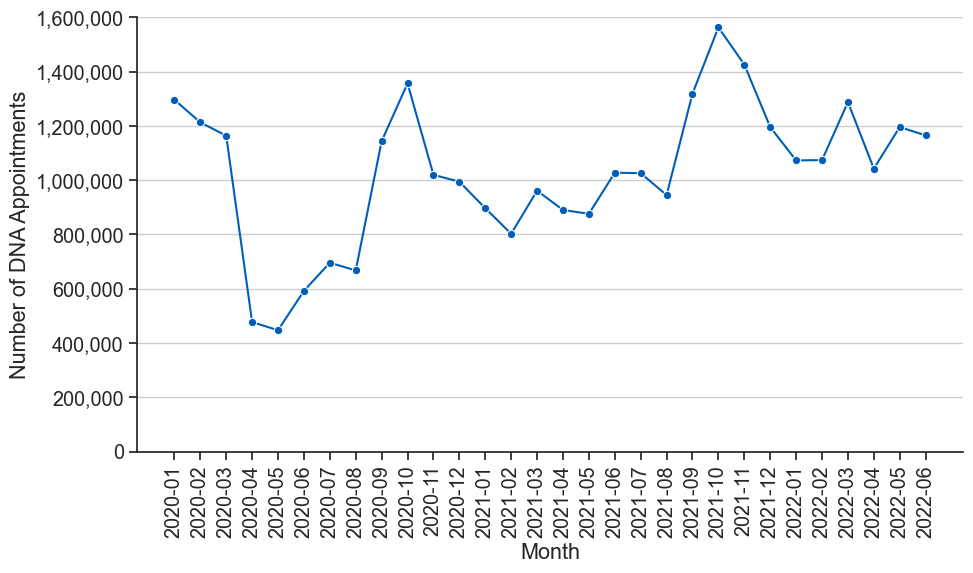

In [189]:
# Plot DNA appointments over time
ax = sns.lineplot(data=status_over_time,
                  x='appointment_month',
                  y='count_of_appointments',
                  marker='o')

# Format x labels
ax.set_xticklabels(status_over_time['appointment_month'].unique(), rotation=90)

# Format y axis
plt.ylim(0, 1600000)
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set title and axis labels
ax.set(xlabel = 'Month',
       ylabel = 'Number of DNA Appointments')

plt.tight_layout()
plt.show()

**Observation:** 
Diffcult to determine increase in DNA rate - must cross checked with % distribution below (to ensure spike in overall volume is not obscuring DNA patterns)

### DNA YoY
Determine if DNA rate is increasing

In [192]:
# Return % DNA by year
dna_breakdown('year')

,year,percent_dna
0,2020,4.029725
1,2021,4.168647
2,2022,4.334151


In [193]:
# Return % DNA by month
month_dna = dna_breakdown('appointment_month')

# Add month name and year
month_dna['month_name'] = month_dna['appointment_month'].dt.month_name()
month_dna['year'] = month_dna['appointment_month'].dt.year

month_dna.head()

,appointment_month,percent_dna,month_name,year
0,2020-01-01,4.766452,January,2020
1,2020-02-01,5.034185,February,2020
2,2020-03-01,4.841026,March,2020
3,2020-04-01,2.981424,April,2020
4,2020-05-01,2.726008,May,2020


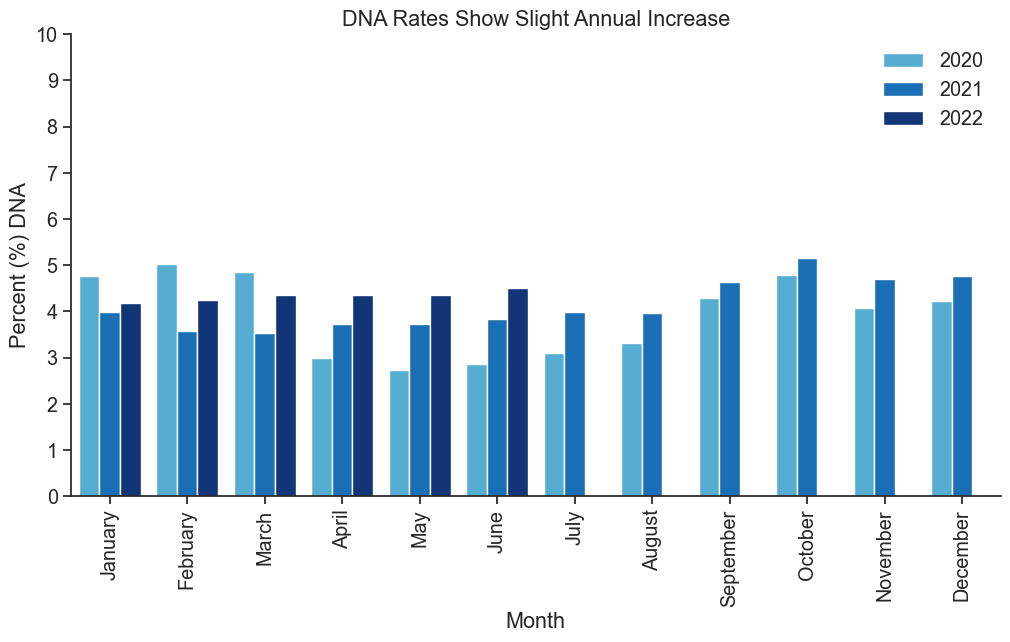

In [194]:
default_style()

# Plot % of DNA appointments over time
ax = sns.barplot(data=month_dna,
                 x='month_name',
                 y='percent_dna',
                 hue='year',
                 palette=['#41B6E6', '#0072CE', '#003087'])

# Set title and axis labels
ax.set(xlabel = 'Month',
       ylabel = 'Percent (%) DNA',
       title='DNA Rates Show Slight Annual Increase')

plt.xticks(rotation=90)

# Format legend
ax.legend(frameon=False)
plt.ylim(0, 10)

# Format y axis ticks
int_y()

plt.show()

**Observation:** Looking at the above graph, DNA have very slightly increased over the reporting period. However, I believe this change is too small to draw large conclusions from (see YoY change overall - all years round to 4%)

### DNA + Appointment mode

In [197]:
# Reutrn DNA percent by appointment mode
mode_dna = dna_breakdown('appointment_mode')
mode_dna

,appointment_mode,percent_dna
0,Face-to-Face,5.505306
1,Home Visit,3.765100
2,Telephone,1.953919
3,Unknown,3.953462
4,Video/Online,4.344824


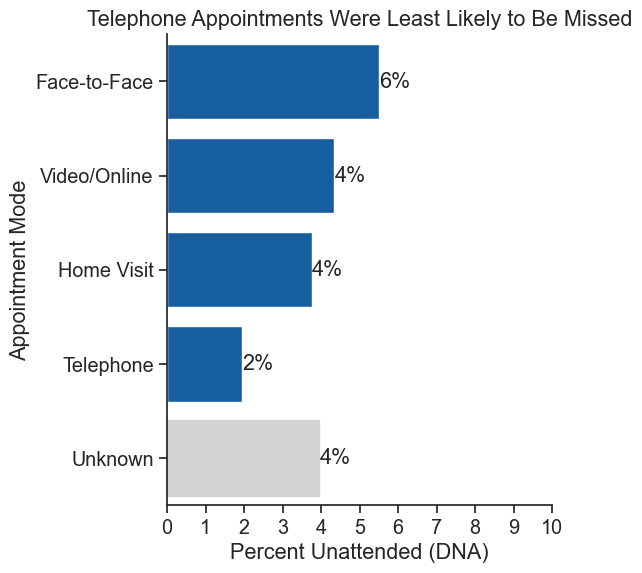

In [198]:
dna_style()

# Plot % of DNA appointments by mode.
ax = sns.barplot(y='appointment_mode', 
                 x='percent_dna', 
                 data=mode_dna,
                 order = ['Face-to-Face', 'Video/Online', 'Home Visit', 'Telephone', 'Unknown'])

# Make 'Unknown' grey
bar = ax.patches
bar[4].set_color('lightgrey')

ax.set(ylabel = 'Appointment Mode',
       xlabel = 'Percent Unattended (DNA)',
       title = 'Telephone Appointments Were Least Likely to Be Missed')

# Adjust y axis
plt.xlim(0, 10)
int_x()

# Set data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f%%')

plt.tight_layout()
plt.savefig('dna_mode.png')
plt.show()

**Observation:** F2F appointments are over 2x more likely to be missed as telephone appointments.

### DNA + HCP type

In [201]:
# Return DNA percent by HCP type
hcp_dna = dna_breakdown('hcp_type')

hcp_dna

,hcp_type,percent_dna
0,GP,2.476183
1,Other Practice staff,6.122949
2,Unknown,2.752272


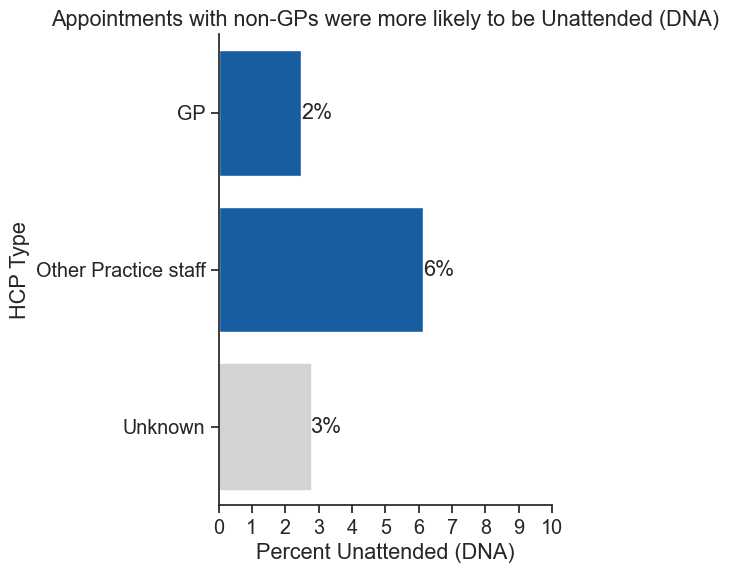

In [202]:
dna_style()

# Create a bar chart to show % of DNA appointments by HCP type.
ax = sns.barplot(y='hcp_type', 
                 x='percent_dna', 
                 data=hcp_dna)

ax.set(ylabel = 'HCP Type', 
       xlabel = 'Percent Unattended (DNA)',
       title = 'Appointments with non-GPs were more likely to be Unattended (DNA)')

# Adjust y axis
plt.xlim(0, 10)
int_x()

bar = ax.patches
bar[2].set_color('lightgrey')

# Set data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f%%')

plt.tight_layout()
plt.savefig('dna_hcp.png')
plt.show()

**Observation:** Appointments with other practice staff are over 2x more likely to be missed as those with GPs.

### DNA + Region

In [205]:
# Return DNA percent by region
region_dna = dna_breakdown('region')
region_dna

,region,percent_dna
0,East of England,3.272387
1,London,5.068020
2,Midlands,4.230473
3,North East and Yorkshire,3.575144
4,North West,5.115260
5,South East,4.069184
6,South West,3.672696


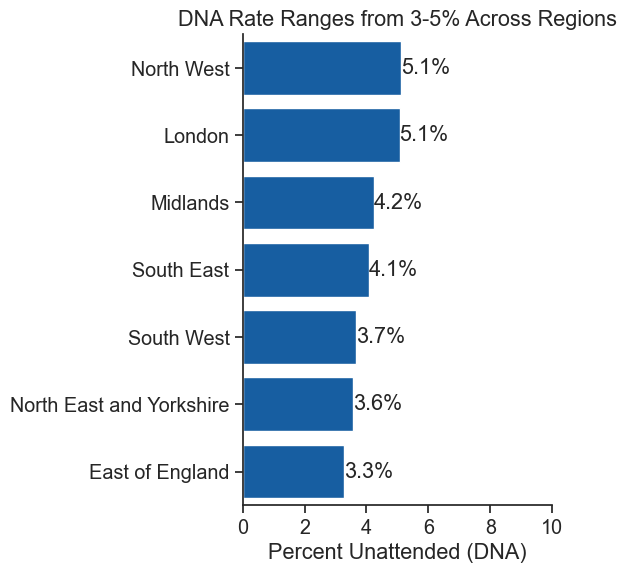

In [206]:
# Create a bar chart to show % of DNA appointments by Region.
ax= sns.barplot(y='region', 
                x='percent_dna', 
                data=region_dna.sort_values(by='percent_dna', ascending=False))

ax.set(ylabel=None, 
       xlabel='Percent Unattended (DNA)', 
       title='DNA Rate Ranges from 3-5% Across Regions')

# Adjust x axis
plt.xlim(0, 10)

# Add data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')

plt.tight_layout()
plt.show()

**Observation:** DNA rate ranges from 3-5% across regions. This rate does not appear to correlate with how high-volume a region is overall.

### DNA + Time Between Book & Appointment

In [209]:
# Return DNA percent by time between book and appointment
time_dna = dna_breakdown('time_between_book_and_appointment')

time_dna

,time_between_book_and_appointment,percent_dna
0,15-21 Days,7.662728
1,2-7 Days,5.649845
2,22-28 Days,7.800777
3,28+ Days,8.813985
4,8-14 Days,7.121657
5,Next Day,3.874823
6,Same Day,1.762258
7,Unknown,3.522531


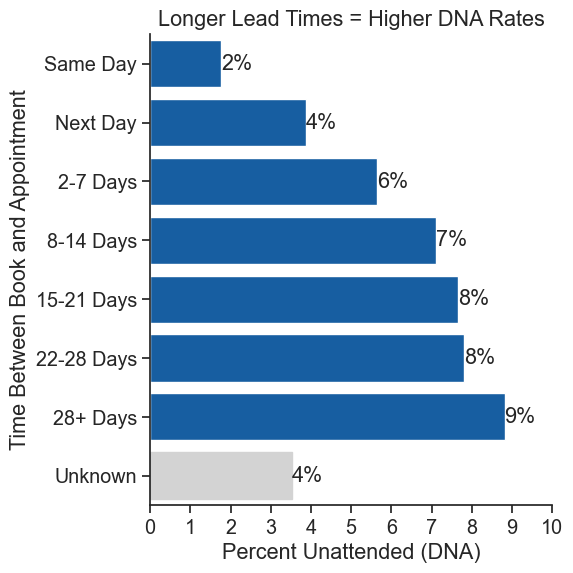

In [210]:
dna_style()
# Create a bar chart to show % of DNA appointments by time between book and appointment.
ax = sns.barplot(y='time_between_book_and_appointment', 
                 x='percent_dna', 
                 data=time_dna,
                 order=['Same Day', 'Next Day', '2-7 Days', '8-14 Days', '15-21 Days', 
                                  '22-28 Days', '28+ Days', 'Unknown'])

bar = ax.patches
bar[7].set_color('lightgrey')

# Adjust y axis
plt.xlim(0, 10)
int_x()

ax.set(ylabel = 'Time Between Book and Appointment', 
                   xlabel = 'Percent Unattended (DNA)', 
                   title = 'Longer Lead Times = Higher DNA Rates')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f%%')

plt.tight_layout()
plt.savefig('dna_tbbaa.png')
plt.show()

**Observation:** The longer the lead time, the more likely an appointment is to be missed.

#

# Time between book and appointment analysis

### Lead time overall

In [215]:
tbbaa_order = ['Same Day', 'Next Day', '2-7 Days', '8-14 Days', 
               '15-21 Days', '22-28 Days', '28+ Days', 'Unknown']

Number of unique values for time_between_book_and_appointment: 8

Percentage (%) of total appointments for each:


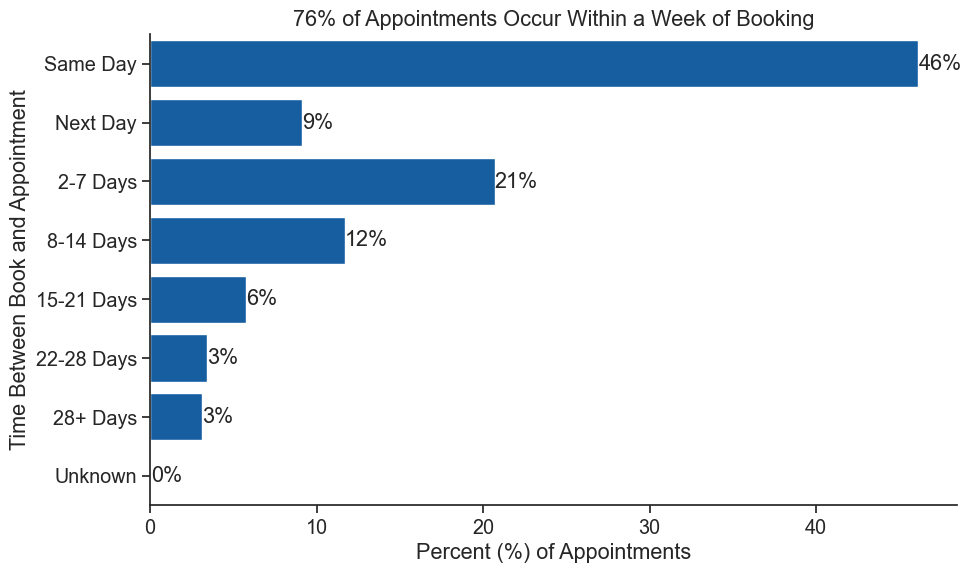

In [216]:
pptx_style()

tbbaa_overall = rel_freq(ar2, 'time_between_book_and_appointment')

# Plot overall lead time as a barplot
ax = sns.barplot(data=tbbaa_overall,
                 y='time_between_book_and_appointment',
                 x='% of appts',
                 order=tbbaa_order)

ax.set(ylabel='Time Between Book and Appointment', 
       xlabel='Percent (%) of Appointments', 
       title='76% of Appointments Occur Within a Week of Booking')

# Add data labels
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f%%')

plt.tight_layout()
plt.savefig('tbbaa.png')
plt.show()

### Lead Time Over Time

In [218]:
# Group ar data set by month (multiple options grouped for exploratory charting)
ar_tbbaa = ar2.groupby(['year', 'appointment_month', 'month', 'month_name', 'time_between_book_and_appointment'])\
    [['count_of_appointments']].sum().reset_index().copy()

ar_tbbaa.sample(5)

,year,appointment_month,month,month_name,time_between_book_and_appointment,count_of_appointments
187,2021,2021-12-01,12,December,28+ Days,783762
84,2020,2020-11-01,11,November,8-14 Days,2960255
89,2020,2020-12-01,12,December,2-7 Days,5015521
152,2021,2021-08-01,8,August,15-21 Days,1452010
208,2022,2022-03-01,3,March,15-21 Days,1905345


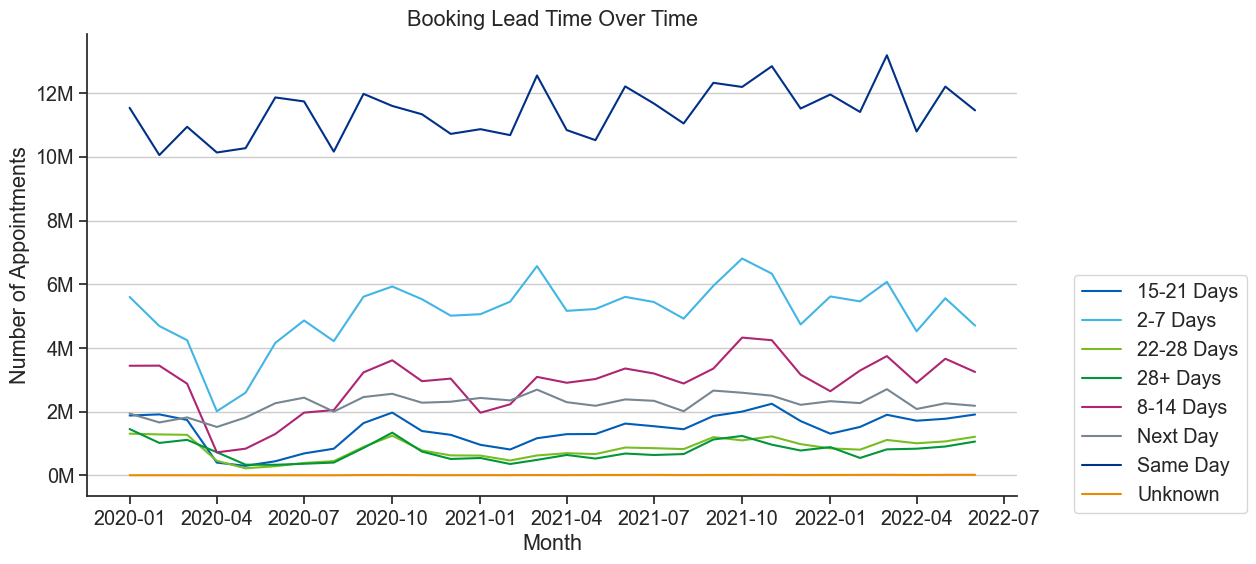

In [448]:
default_style()

# Plot data by month
ax = sns.lineplot(data=ar_tbbaa,
                  x='appointment_month',
                  y='count_of_appointments',
                  hue='time_between_book_and_appointment',
                  errorbar=None,
                  palette=nhs_cols)


# Set title and axis labels
ax.set(title='Booking Lead Time Over Time',
       xlabel = 'Month',
       ylabel = 'Number of Appointments')

# Format legend
plt.legend(title=None, bbox_to_anchor=(1.05, 0.5))

# Format y axis
mil_y()

plt.show()

**Observation:** This chart is difficult to make sense of, so have looked at % breakdown YoY below instead

### YoY difference in lead time

In [452]:
# Group by year and lead time
ar_tbbaa_grouped = ar_tbbaa.groupby(['year', 'time_between_book_and_appointment'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Group by year only to get totals
year_grouped = ar_tbbaa.groupby(['year'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Merge in year
ar_tbbaa_merge = pd.merge(ar_tbbaa_grouped, year_grouped, how='left', on='year')\
    .rename(columns={'count_of_appointments_x' : 'tbbaa_tot', 
                     'count_of_appointments_y' : 'year_tot'})

# Create a % of total column for each lead by by year
ar_tbbaa_merge['percent_of_year_total'] = ((ar_tbbaa_merge['tbbaa_tot']  / ar_tbbaa_merge['year_tot']) * 100)

# Pivot to view and chart
tbbaa_piv = pd.pivot_table(data=ar_tbbaa_merge,
                           index='year',
                           columns='time_between_book_and_appointment',
                           values='percent_of_year_total')

# Order columns logically
tbbaa_piv = tbbaa_piv[['Same Day', 'Next Day', '2-7 Days', '8-14 Days', '15-21 Days', '22-28 Days', '28+ Days']]

tbbaa_piv

time_between_book_and_appointment,Same Day,Next Day,2-7 Days,8-14 Days,15-21 Days,22-28 Days,28+ Days
year,,,,,,,
2020,48.199076,9.144142,19.842374,10.748713,5.285692,3.370638,3.368712
2021,44.916839,9.256822,21.699111,12.181375,5.805062,3.280044,2.804430
2022,45.022622,8.780019,20.257795,12.365960,6.436431,3.850203,3.217244


**Quick exploratory chart**

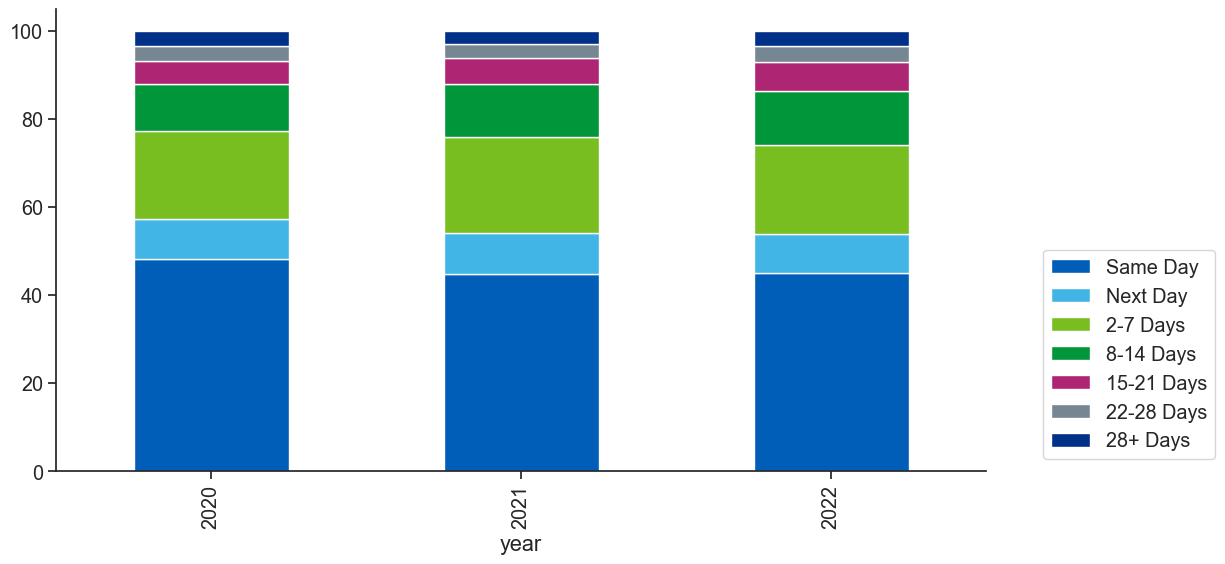

In [460]:
# Create a stacked bar by year
tbbaa_stacked = tbbaa_piv.plot(kind='bar', stacked=True)
plt.legend(title=None, bbox_to_anchor=(1.05, 0.5))
plt.show()

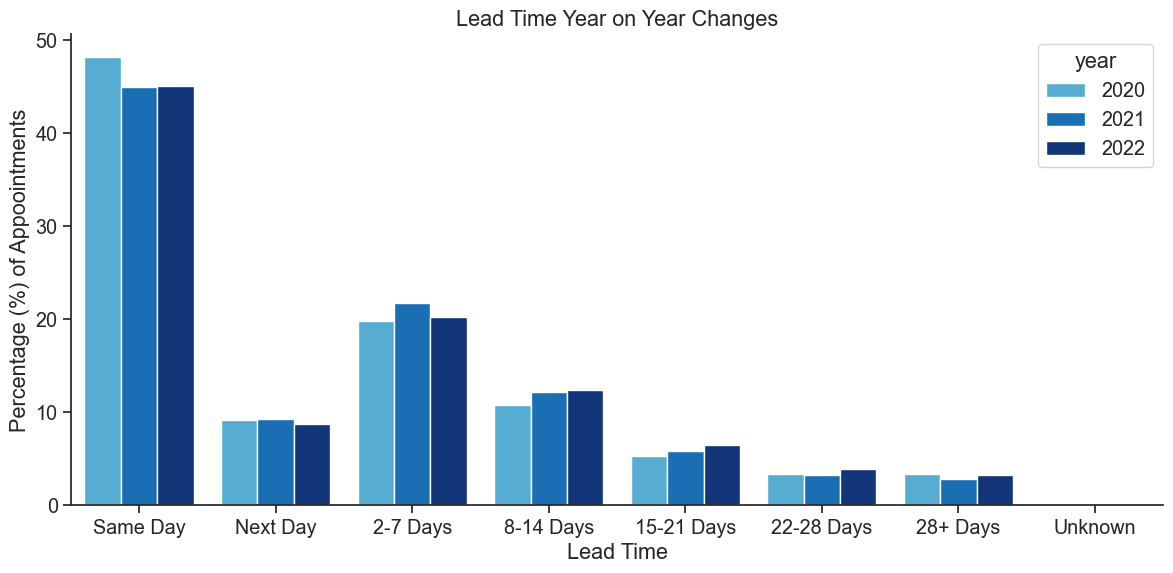

In [464]:
default_style()

ax = sns.barplot(data=ar_tbbaa_merge,
                 x='time_between_book_and_appointment',
                 y='percent_of_year_total',
                 hue='year',
                 order=tbbaa_order,
                 palette=['#41B6E6', '#0072CE', '#003087'])

# Set title and axis labels
ax.set(title='Lead Time Year on Year Changes',
       xlabel = 'Lead Time',
       ylabel = 'Percentage (%) of Appoointments')

plt.tight_layout()
plt.show()

**Filtering for just Jan-June to ensure this pattern in consistent when looking at the same period YoY. I have exported to csv to quickly check rather than pivoting and charting here.**

In [227]:
tbbaa_filtered = ar_tbbaa[ar_tbbaa['month'].isin([1, 2, 3, 4, 5, 6])]

tbbaa_yoy = tbbaa_filtered.groupby(['year', 'time_between_book_and_appointment'])\
    [['count_of_appointments']].sum().reset_index().copy()

tbbaa_yoy.head()

,year,time_between_book_and_appointment,count_of_appointments
0,2020,15-21 Days,6694262
1,2020,2-7 Days,23319545
2,2020,22-28 Days,4851997
3,2020,28+ Days,5001193
4,2020,8-14 Days,12641594


**Obseration:** Lead time appears to be going up gradually over time. However, these visuals here do not show this clearly. Will use just the numbers or build a quick visualisation in PowerPoint to communicate this to stakeholders.

### Lead time by month/season

In [230]:
# Group by month and lead time 
ar_tbbaa_grouped2 = ar2.groupby(['month', 'time_between_book_and_appointment'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Group by month only
month_grouped = ar2.groupby(['month'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Merge in year
ar_tbbaa_merge2 = pd.merge(ar_tbbaa_grouped2, month_grouped, how='left', on='month')\
    .rename(columns={'count_of_appointments_x' : 'tbbaa_tot', 
                 'count_of_appointments_y' : 'month_tot'})

# Create a % of total column for each lead by by year
ar_tbbaa_merge2['percent_of_month_total'] = (ar_tbbaa_merge2['tbbaa_tot']  / ar_tbbaa_merge2['month_tot']) * 100

In [231]:
# Create two groups to see clearer patterns
lead_groups = {'Same Day' : 'Same or Next Day', 
               'Next Day' : 'Same or Next Day', 
               '2-7 Days' : 'Within 1 Week', 
               '8-14 Days' : 'Over 1 Week', 
               '15-21 Days' : 'Over 1 Week', 
               '22-28 Days' : 'Over 1 Week', 
               '28+ Days' : 'Over 1 Week'}

ar_tbbaa_merge2['lead_group'] = ar_tbbaa_merge2['time_between_book_and_appointment'].map(lead_groups)

ar_tbbaa_merge2

,month,time_between_book_and_appointment,tbbaa_tot,month_tot,percent_of_month_total,lead_group
0,1,15-21 Days,4154546,75298676,5.517422,Over 1 Week
1,1,2-7 Days,16286448,75298676,21.629129,Within 1 Week
2,1,22-28 Days,2787339,75298676,3.701711,Over 1 Week
3,1,28+ Days,2897264,75298676,3.847696,Over 1 Week
4,1,8-14 Days,8058900,75298676,10.702579,Over 1 Week
...,...,...,...,...,...,...
91,12,28+ Days,1302181,48660237,2.676068,Over 1 Week
92,12,8-14 Days,6205847,48660237,12.753425,Over 1 Week
93,12,Next Day,4533041,48660237,9.315699,Same or Next Day
94,12,Same Day,22241379,48660237,45.707502,Same or Next Day


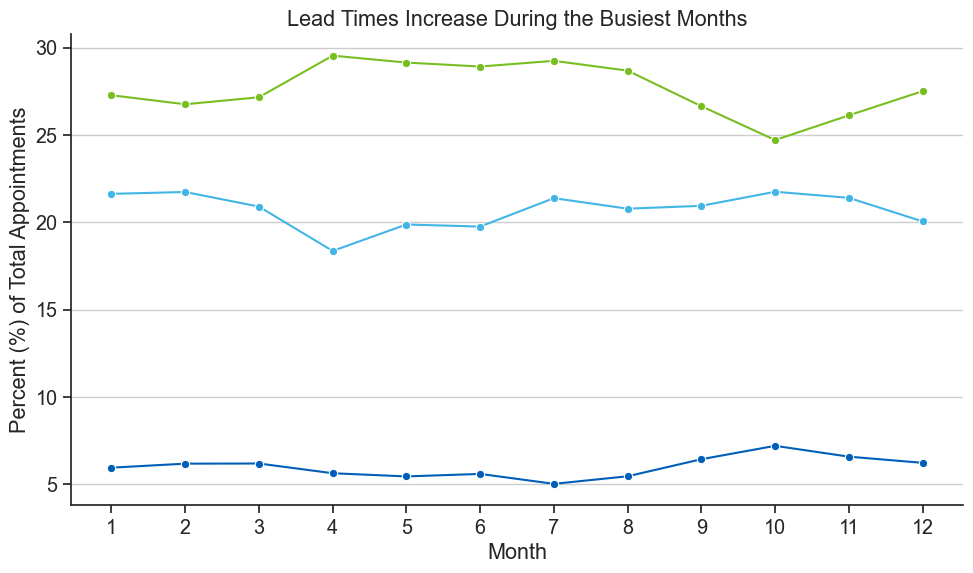

In [232]:
pptx_style()

# Create a line plot to show variation by month
ax = sns.lineplot(data=ar_tbbaa_merge2,
                  x='month',
                  y='percent_of_month_total',
                  hue='lead_group',
                  marker='o',
                  errorbar=None)

# Format legend
# ax.legend(title=None, frameon=False, loc='center left')
ax.legend_.remove()   # Removed for pptx - will make clearer legend manually

# Set title and axis labels
ax.set(title='Lead Times Increase During the Busiest Months',
                xlabel='Month',
                ylabel='Percent (%) of Total Appointments')

# Set y axis format
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y')

# Force all axis labels to show
plt.xticks(range(1, 13))

plt.tight_layout()
plt.savefig('tbbaa_season.png')
plt.show()

**Observation:** Patients are more likely to wait over a week for an appointment during autumn and winter - the busiest seasons.

#

# Appointment Duration analysis

### Duration over time

In [237]:
# Group data by date, month and year (multiple date groupings for charting options)
ad_over_time = ad2.groupby(['year', 'appointment_date', 'actual_duration'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Group my month to obscure daily fluctuations in the data
ad_over_time['appointment_month'] = ad_over_time['appointment_date'].dt.to_period('M').dt.to_timestamp()

# Group durations for easier pattern recognition
duration_mapper = {'1-5 Minutes' : '10 or under',
                   '6-10 Minutes' : '10 or under',
                   '11-15 Minutes' : '11-20',
                   '16-20 Minutes' : '11-20',
                   '21-30 Minutes' : '21+',
                   '31-60 Minutes' : '21+',
                   'Unknown / Data Quality' : 'Unknown'}

ad_over_time['duration_group'] = ad_over_time['actual_duration'].map(duration_mapper)

ad_over_time.sample(5)

,year,appointment_date,actual_duration,count_of_appointments,appointment_month,duration_group
1436,2022,2022-06-24,11-15 Minutes,1037455,2022-06-01,11-20
902,2022,2022-04-08,Unknown / Data Quality,1552485,2022-04-01,Unknown
1213,2022,2022-05-23,16-20 Minutes,835974,2022-05-01,11-20
822,2022,2022-03-28,21-30 Minutes,698136,2022-03-01,21+
269,2022,2022-01-08,21-30 Minutes,11467,2022-01-01,21+


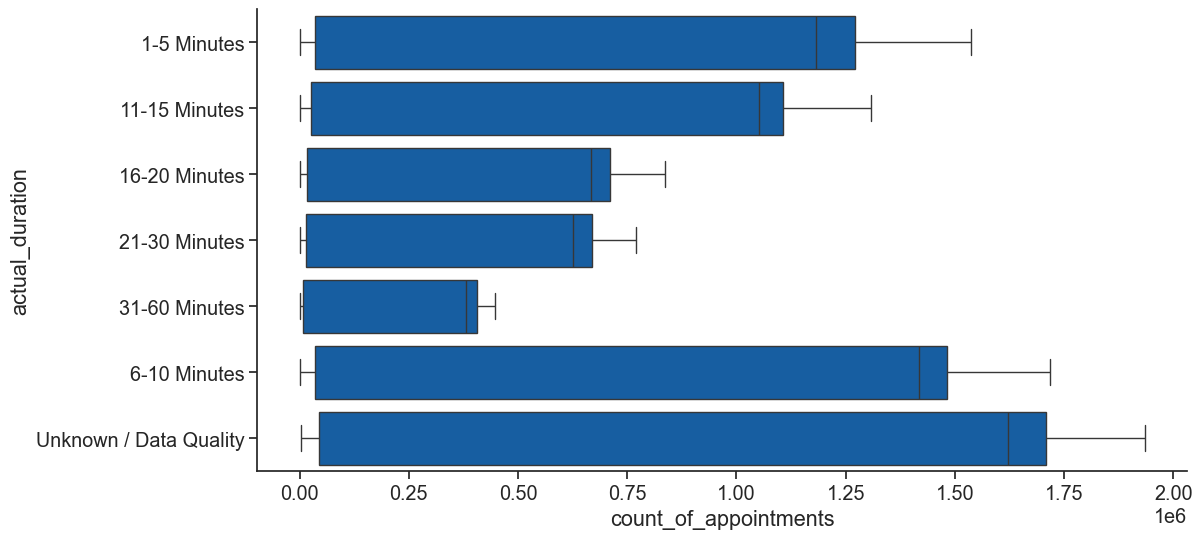

In [468]:
sns.boxplot(data=ad_over_time,
            y='actual_duration',
            x='count_of_appointments')

plt.show()

**Observations:**

While there are small changes in appointment durations over time (appointments under 10 minutes have decreased 2% while longer ones have increased), it is difficult to draw any conclusions here as the data covers only seven months (and so cannot account for seasonality) and there is a high percentage of 'Unknowns' in the data. This should be evaluated over a longer time period.
 
*Observations from additional charts in appendix:*
- No noticeable difference between top 10 busy ICBs vs all others
- No notable differences based on day of week (M-F).
- Weekend appointments tend to be shorter.

# Twitter analysis - Assignment 5

In [242]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [243]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [244]:
# Explore the data set with the describe() and info() functions
print(tweets.info())
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [245]:
# Explore the tweet_retweet_count column with the value_counts() function
tweets['tweet_retweet_count'].value_counts().reset_index().sort_values(by='tweet_retweet_count')

,tweet_retweet_count,count
0,0,526
1,1,215
2,2,114
3,3,70
5,4,27
4,5,35
11,6,12
6,7,18
8,8,15
10,9,13


In [246]:
# Explore the tweet_favorite_count column with the value_counts() function
tweets['tweet_favorite_count'].value_counts().reset_index().sort_values(by='tweet_favorite_count')

,tweet_favorite_count,count
0,0,1027
1,1,91
2,2,16
3,3,13
4,4,7
5,5,5
6,6,2
13,7,1
10,8,1
18,9,1


In [247]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [248]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [249]:
# Display the first 30 records.
tags2 = pd.Series(tags)

tags3 = tags2.value_counts().head(30)

tags3

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [250]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags3).reset_index()

# Rename the columns.
data.columns = ['word', 'count']

In [251]:
# Ensure the count data type is an integer for data analysis
data.dtypes

word     object
count     int64
dtype: object

In [252]:
# Display records where the count is larger than 10
over_ten = data[(data['count'] > 10)]
over_ten

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [253]:
# Remove any overrepresented hashtags
over_ten = data[(data['count'] > 10) & (data['count'] < 80)]

<Axes: xlabel='count', ylabel='word'>

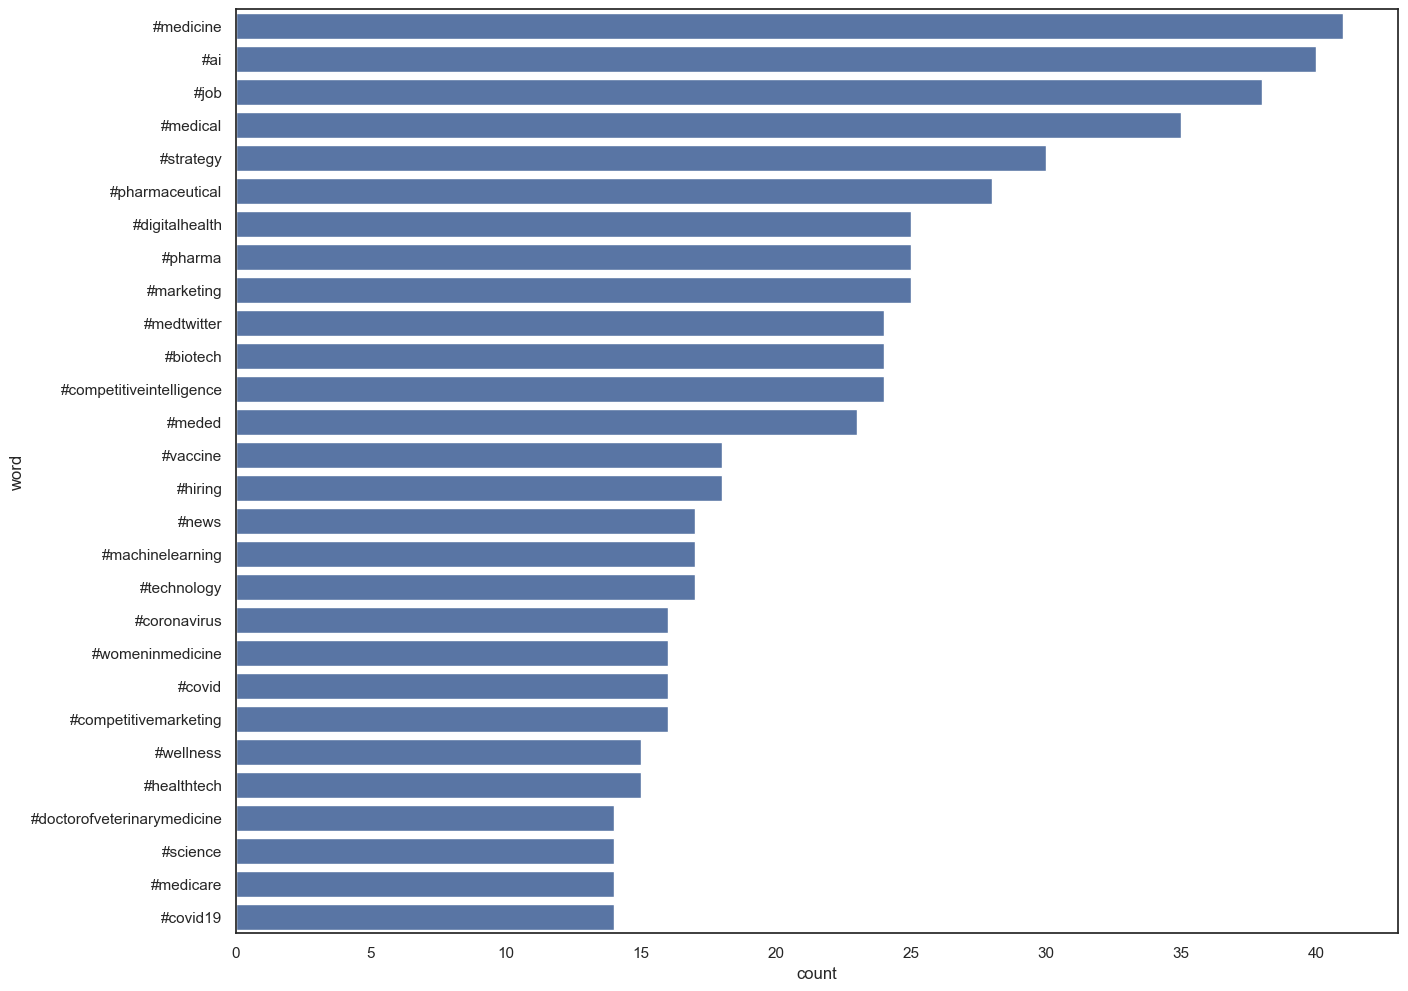

In [254]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(data=over_ten,
            x='count',
            y='word')

**Observations on social listening**
- Social-media analysis could potentially be useful as an additional tool to add to understanding of patient experiences and sentiment.
- However, we must consider that Twitter may not be representative of the overall population. We would also need to clean for marketing Tweets.
- The data provided here is not very applicable to this brief and will not be included in presenting to stakeholders.
- A more relevant use for this project could be could also be used to track trending conversations, companies and innovations in the appointment-management space for potential approaches and technologies the NHS might adopt.

#

# Make Recommendations to the NHS

1. There does seem to be a need to increase capacity based on increasing number of appointments year on year and benchmarking monthly average against dailiy capacity of 1.2 million
2. Utilise support staff to help manage volume during peak seasonal times, assigning patient care to practice nurses and other HCP types where appropriate
3. Adjust weekly staffing to meet Monday-Tuesday rush
4. Nudge patients toward later-week appointments
5. Default to telephone appointments where appropriate to reduce DNAs and help GPs manage appointment load
6. Used tiered reminder systems (digital and phone call) especially for patients seeing other HCP types and whose apppointments are scheduled with a longer lead time.


# Useful variables
*For reference - variables created throughout and used in multiple code blocks*

In [260]:
# List of just weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Days of week in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# DataFrame totalling appointments by day across the nc time period
appts_by_day = nc2.groupby(['appointment_date', 'day'])[['count_of_appointments']]\
    .sum().reset_index().copy()

# DataFrame totalling appointments by month across ar time period
ar_agg = ar2.groupby('appointment_month')[['count_of_appointments']]\
.sum().reset_index().copy()

# Region totals by DataFrame
nc_region_totals = nc2.groupby('region')[['count_of_appointments']].sum().reset_index().copy()
ad_region_totals = ad2.groupby('region')[['count_of_appointments']].sum().reset_index().copy()

# Dictionary to rename values for time_between_book_and_appointment
time_mapper = {'1 Day' : 'Next Day', 
               '15  to 21 Days' : '15-21 Days', 
               '2 to 7 Days' : '2-7 Days', 
               '22  to 28 Days' : '22-28 Days',
               '8  to 14 Days' : '8-14 Days', 
               'More than 28 Days' : '28+ Days', 
               'Same Day' : 'Same Day',
               'Unknown / Data Quality' : 'Unknown'}

# Order for time_between_book_and_appointment
tbbaa_order = ['Same Day', 'Next Day', '2-7 Days', '8-14 Days', 
               '15-21 Days', '22-28 Days', '28+ Days', 'Unknown']

# Seasons mapper (based on month number)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter']
season_map = dict(zip(months, seasons))

# Top 10 ICBs by total appointments
busy_icbs = ['E54000050', 'E54000054', 'E54000057', 'E54000008', 'E54000027', 
             'E54000029', 'E54000042', 'E54000051', 'E54000032', 'E54000053']

# Appendix: Other Work

### DNA + Seasonality

In [263]:
# Return % DNA over time
month_dna = dna_breakdown('appointment_month')

# Add season to add to hue on bar chart
# First extract month (also adding month name and year to use this DataFrame for a YoY chart (see below)
month_dna['month'] = month_dna['appointment_month'].dt.month
month_dna['month_name'] = month_dna['appointment_month'].dt.month_name()
month_dna['year'] = month_dna['appointment_month'].dt.year

# Create a dictionary of seasons
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter']
season_map = dict(zip(months, seasons))
# Map dictionary on to the DataFrame
month_dna['Season'] = month_dna['month'].map(season_map)

# Format appointment month  to remove '-01' at the end
month_dna['appointment_month'] = month_dna['appointment_month'].astype(str).str[:-3]

month_dna.head(10)

,appointment_month,percent_dna,month,month_name,year,Season
0,2020-01,4.766452,1,January,2020,Winter
1,2020-02,5.034185,2,February,2020,Winter
2,2020-03,4.841026,3,March,2020,Spring
3,2020-04,2.981424,4,April,2020,Spring
4,2020-05,2.726008,5,May,2020,Spring
5,2020-06,2.863894,6,June,2020,Summer
6,2020-07,3.094790,7,July,2020,Summer
7,2020-08,3.313855,8,August,2020,Summer
8,2020-09,4.282529,9,September,2020,Autumn
9,2020-10,4.793354,10,October,2020,Autumn


In [264]:
# Return % DNA by month
month_dna2 = dna_breakdown('month')

# Add season for bar chart hue
month_dna2['Season'] = month_dna['month'].map(season_map)

month_dna2

,month,percent_dna,Season
0,1,4.337002,Winter
1,2,4.301080,Winter
2,3,4.221432,Spring
3,4,3.778285,Spring
4,5,3.738945,Spring
5,6,3.800141,Summer
6,7,3.570973,Summer
7,8,3.666201,Summer
8,9,4.459299,Autumn
9,10,4.982126,Autumn


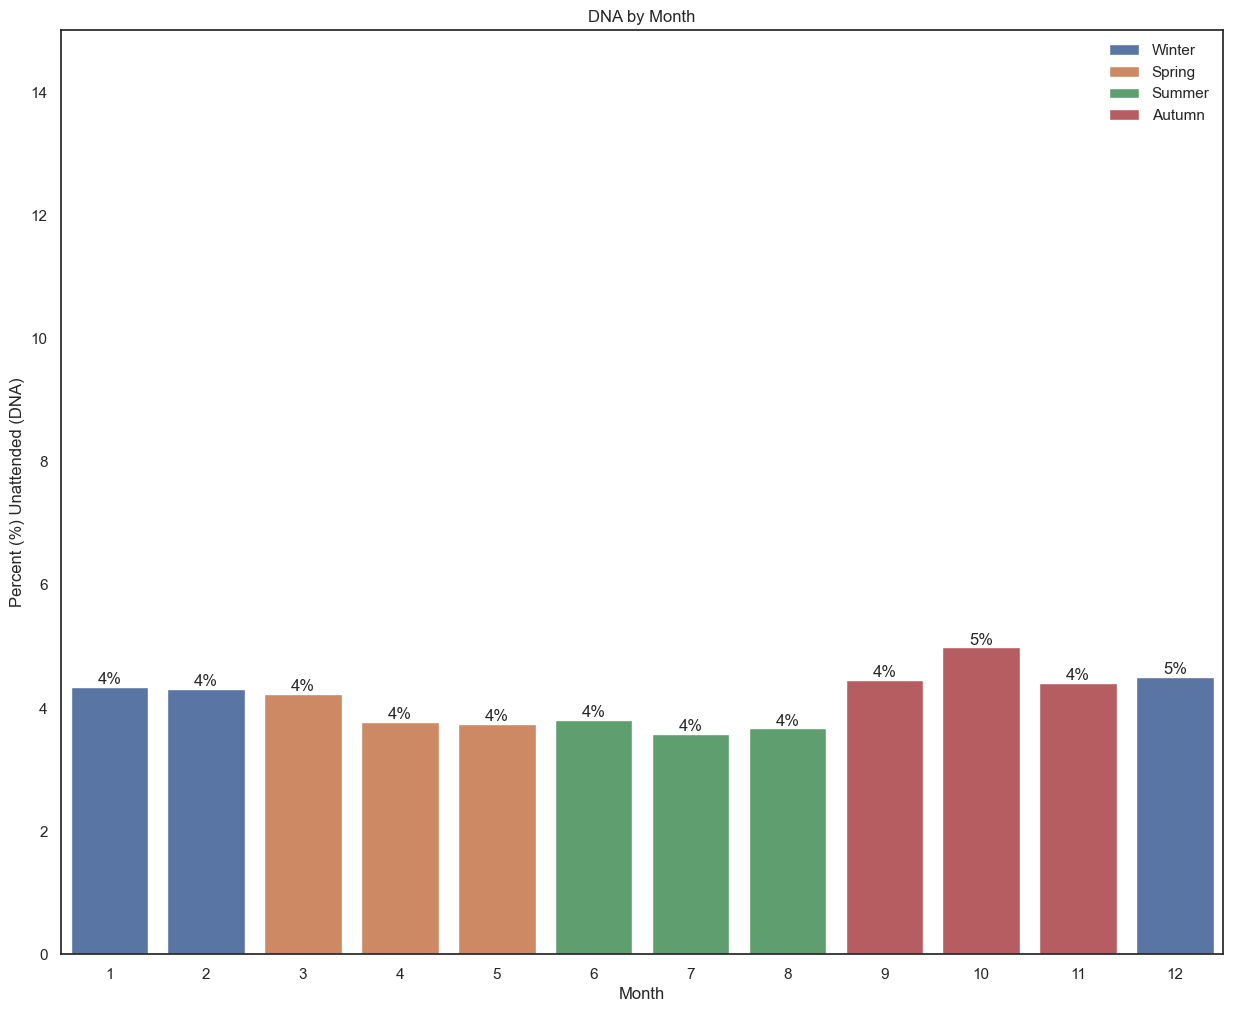

In [265]:
# Plot DNA % by month
month_dna_bar2 = sns.barplot(data=month_dna2,
             x='month',
             y='percent_dna',
             hue='Season')

# Format x labels
# month_dna_bar.set_xticklabels(month_dna['appointment_month'].unique(), rotation=45)

# Adjust y axis
plt.ylim(0, 15)
int_y()

# Set title and axis labels
month_dna_bar2.set(title='DNA by Month',
            xlabel = 'Month',
            ylabel = 'Percent (%) Unattended (DNA)')

for i in month_dna_bar2.containers:
    month_dna_bar2.bar_label(i, fmt='%.0f%%')

month_dna_bar2.legend(frameon=False)

plt.show()

**Observation:** DNA appointments spike in autumn, roughly doubling between August and October.

### Mode by ICB segment

In [268]:
# Group by segment and mode
icb_mode = ar2.groupby(['busy_icb', 'appointment_mode'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Total appointments by segment
icb_total = ar2.groupby(['busy_icb'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Merge in totals
icb_mode_merge = pd.merge(icb_mode, icb_total, on='busy_icb', how='left')\
    .rename(columns={'count_of_appointments_x' : 'mode_count', 
                     'count_of_appointments_y' : 'icb_total'})

# Calculate percent of total
icb_mode_merge['percent_of_total'] = (icb_mode_merge['mode_count'] / icb_mode_merge['icb_total']) * 100

icb_mode_merge

,busy_icb,appointment_mode,mode_count,icb_total,percent_of_total
0,All Other Practices,Face-to-Face,268456950,452234551,59.362326
1,All Other Practices,Home Visit,2692237,452234551,0.595319
2,All Other Practices,Telephone,162704798,452234551,35.977967
3,All Other Practices,Unknown,16433837,452234551,3.633919
4,All Other Practices,Video/Online,1946729,452234551,0.430469
5,Busy Practice,Face-to-Face,171419978,290295208,59.050227
6,Busy Practice,Home Visit,2156506,290295208,0.742867
7,Busy Practice,Telephone,105047707,290295208,36.186511
8,Busy Practice,Unknown,10005471,290295208,3.446654
9,Busy Practice,Video/Online,1665546,290295208,0.573742


### HCP Type by Region

In [270]:
reg_hcp = ar2.groupby(['region', 'hcp_type'])\
    [['count_of_appointments']].sum().reset_index().copy()

reg_hcp_merge = pd.merge(reg_hcp, ar_region_totals, on='region', how='left')

reg_hcp_merge['percent_of_total'] = reg_hcp_merge['count_of_appointments_x'] / reg_hcp_merge['count_of_appointments_y'] * 100

reg_hcp_piv = pd.pivot_table(data=reg_hcp_merge, index='region', columns='hcp_type', values='percent_of_total').sort_values(by='GP', ascending=False)

reg_hcp_piv

hcp_type,GP,Other Practice staff,Unknown
region,,,
London,61.188786,37.349682,1.461531
South East,53.134270,44.819128,2.046602
North West,52.540438,43.982440,3.477123
Midlands,50.817272,45.877308,3.305419
East of England,47.707261,48.332128,3.960611
South West,47.121809,48.332151,4.546040
North East and Yorkshire,44.764118,51.455878,3.780004


<Figure size 1000x500 with 0 Axes>

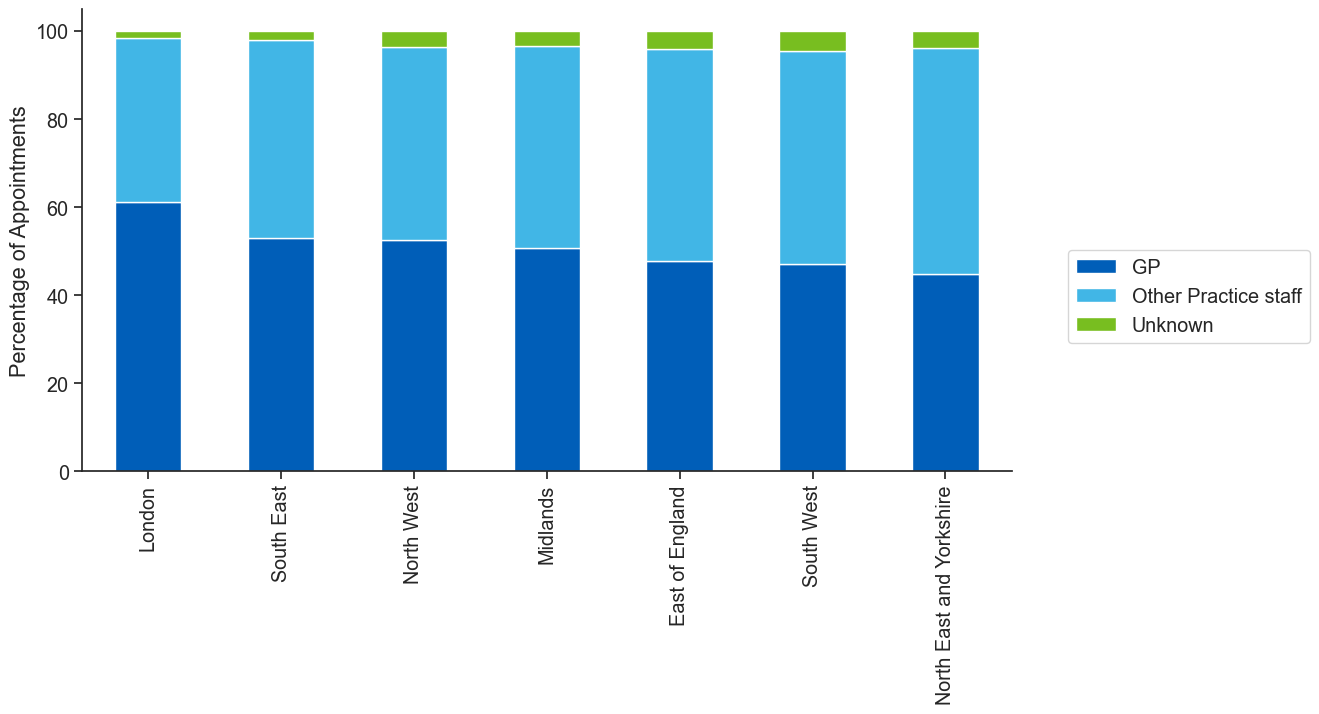

In [476]:
# Plot as a stacked bar
plt.figure(figsize=(10,5))
reg_hcp_piv.plot(kind='bar', stacked=True)
plt.ylabel('Percentage of Appointments')
plt.xlabel(None)
plt.legend(title=False, bbox_to_anchor=(1.05, 0.5))
plt.show()

### HCP Type by Practice Segment

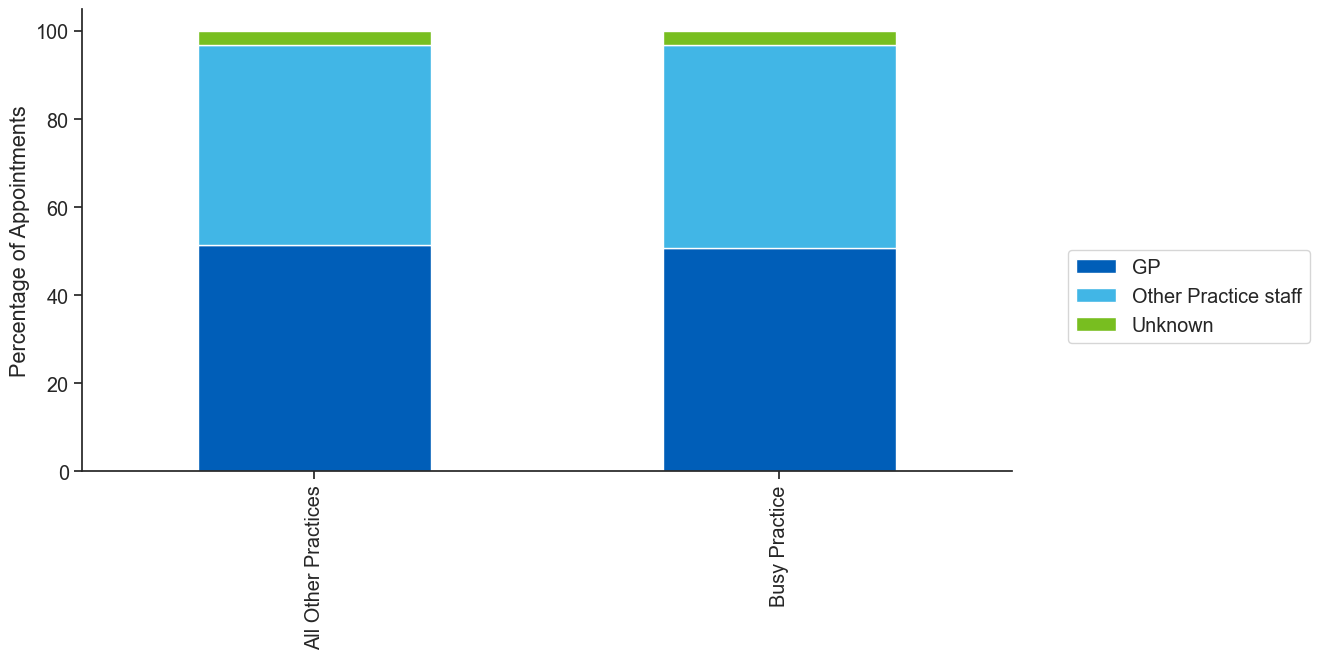

In [482]:
icb_hcp = ar2.groupby(['busy_icb', 'hcp_type'])\
    [['count_of_appointments']].sum().reset_index().copy()

icb_hcp_merge = pd.merge(icb_hcp, icb_total, on='busy_icb', how='left')

icb_hcp_merge['percent_of_total'] = icb_hcp_merge['count_of_appointments_x'] / icb_hcp_merge['count_of_appointments_y'] * 100

icb_hcp_piv = pd.pivot_table(data=icb_hcp_merge, index='busy_icb', columns='hcp_type', values='percent_of_total')

icb_hcp_piv.plot(kind='bar', stacked=True)
plt.legend(title=False, bbox_to_anchor=(1.05, 0.5))
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.show()

### Service setting by region

In [275]:
# Group by region and service setting
nc_ss_reg = nc2.groupby(['region', 'service_setting'])\
    [['count_of_appointments']].sum().reset_index().copy()

# Aggregate total appointments by region
nc_region_totals = nc2.groupby('region')[['count_of_appointments']]\
    .sum().reset_index().copy()

# Merge totals into the main DataFrame
region_ss = pd.merge(nc_ss_reg, 
                     nc_region_totals, 
                     how='left', 
                     on='region').rename(columns={'count_of_appointments_x': 'count_by_service_setting',
                                      'count_of_appointments_y' : 'region_total'})

# Create a column for % of total
region_ss['percent_of_total'] = region_ss['count_by_service_setting'] / region_ss['region_total'] * 100

# Create a pivot table to view data
region_ss_piv = pd.pivot_table(data=region_ss, 
                               index='region', 
                               columns='service_setting', 
                               values='percent_of_total')

# Sort values for charting
region_ss_piv = region_ss_piv.sort_values(by='General Practice', ascending=False)

region_ss_piv

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped
region,,,,,
North West,0.598397,93.284979,1.083817,1.642435,3.390371
South East,0.698703,92.609423,1.836587,2.004474,2.850814
London,1.172930,92.103081,1.401368,1.968539,3.354083
Midlands,0.667253,91.688240,1.930633,1.983504,3.730370
North East and Yorkshire,0.609920,90.357872,2.232940,2.435927,4.363341
South West,0.748795,90.298553,1.472351,2.775984,4.704316
East of England,0.647149,89.607153,2.765100,2.956557,4.024041


### Duration by practice type

In [279]:
duration_by_practice_seg = ad2.groupby(['actual_duration', 'busy_icb'])[['count_of_appointments']].sum()

duration_by_practice_seg = duration_by_practice_seg.unstack()

**Quick exploratory visualisation**

<Axes: xlabel='None,busy_icb'>

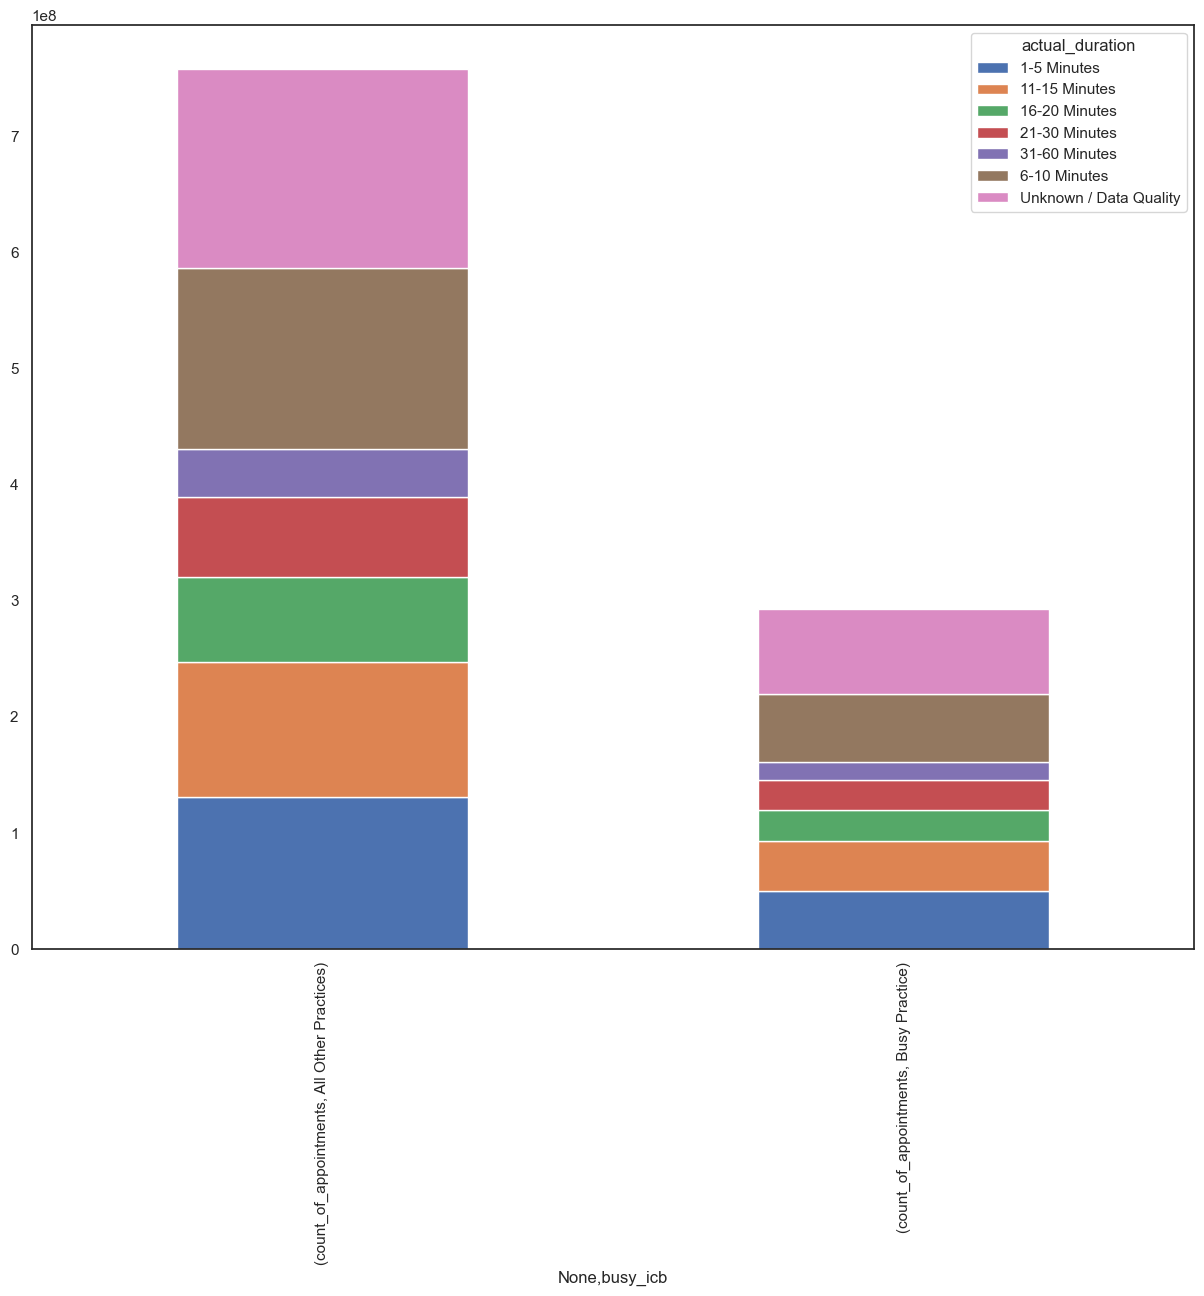

In [281]:
duration_by_practice_seg.T.plot(kind='bar', 
                              stacked=True)

### Duration by region

In [283]:
# Aggregate ad data set by region and duration
region_duration = ad2.groupby(['region', 'actual_duration'])[['count_of_appointments']].sum().reset_index().copy()

# Aggregate total appointments by region
ad_region_totals = ad2.groupby('region')[['count_of_appointments']].sum().reset_index().copy()

# Merge totals into the region_duration DataFrame
region_duration = pd.merge(region_duration, ad_region_totals, how='left', on='region')

# Rename columns for clarity
region_duration = region_duration.rename(columns={'count_of_appointments_x': 'count_by_duration', 
                                                  'count_of_appointments_y' : 'region_total'})

# Create a column for % of total
region_duration['percent_of_total'] = (region_duration['count_by_duration'] / region_duration['region_total'] * 100).round(0)

# Create a pivot table to view more easily
region_duration_piv = pd.pivot_table(data=region_duration, index='region', columns='actual_duration', values='percent_of_total')

region_duration_piv

actual_duration,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes,Unknown / Data Quality
region,,,,,,,
East of England,19.0,16.0,10.0,9.0,5.0,22.0,20.0
London,15.0,14.0,9.0,8.0,6.0,18.0,30.0
Midlands,18.0,15.0,10.0,9.0,5.0,21.0,22.0
North East and Yorkshire,18.0,16.0,10.0,9.0,5.0,21.0,21.0
North West,15.0,14.0,9.0,9.0,5.0,18.0,30.0
South East,17.0,15.0,9.0,9.0,6.0,20.0,24.0
South West,17.0,15.0,10.0,10.0,6.0,21.0,21.0


### Duration by day of week

In [285]:
# Aggregate ad data set by weekday and duration
day_duration = ad2.groupby(['day', 'actual_duration'])[['count_of_appointments']].sum().reset_index().copy()

# Aggregate total appointments by region
ad_day_totals = ad2.groupby('day')[['count_of_appointments']].sum().reset_index().copy()

# Merge totals into the region_duration DataFrame
day_duration2 = pd.merge(day_duration, ad_day_totals, how='left', on='day')

# Rename columns for clarity
day_duration2 = day_duration2.rename(columns={'count_of_appointments_x': 'count_by_duration', 
                                                  'count_of_appointments_y' : 'day_total'})

# Create a column for % of total
day_duration2['percent_of_total'] = (day_duration2['count_by_duration'] / day_duration2['day_total'] * 100).round(0)

# Create a pivot table
day_duration_piv = pd.pivot_table(data=day_duration2, index='day', columns='actual_duration', values='percent_of_total')

day_duration_piv

actual_duration,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes,Unknown / Data Quality
day,,,,,,,
Friday,17.0,15.0,10.0,9.0,6.0,20.0,23.0
Monday,17.0,15.0,10.0,9.0,5.0,21.0,23.0
Saturday,21.0,13.0,8.0,7.0,4.0,17.0,29.0
Sunday,21.0,12.0,7.0,6.0,4.0,18.0,32.0
Thursday,17.0,15.0,10.0,9.0,6.0,20.0,23.0
Tuesday,17.0,15.0,10.0,9.0,5.0,20.0,23.0
Wednesday,17.0,15.0,10.0,9.0,5.0,20.0,23.0
